# 0.0. Imports

In [1512]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import inflection

from bs4 import BeautifulSoup
import requests
import time
from unidecode import unidecode
import statistics
from IPython.display       import Image
from scipy                   import stats             as ss

## 0.1. Helper Functions

In [1735]:
def jupyter_settings():
    %matplotlib inline
    
    pd.options.display.float_format = '{:20.3f}'.format
    pd.set_option('display.max_rows', 200)
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    sns.set()
    
    
def fillout_reg(df):
    
    list_na = df.loc[:, df.isnull().sum() > 0].columns.to_list()
    
    columns_cat = df.select_dtypes(include='object').columns.to_list()
    
    dict_new_column = {}
    
    for value in columns_cat:
        if len(df[value].value_counts()) > 1:
            get_dum = pd.get_dummies(df[value])
            df = pd.concat([df, get_dum], axis=1)
        df.drop(value, inplace=True, axis=1)

    for value in list_na:
        X_train = df[df[value].notnull()].copy()
        y_train = df[df[value].notnull()][value].copy()

        X_preench = df[df[value].isnull()].copy()
        y_preench = df[df[value].isnull()][value].copy()
        
        X_train.drop(list_na, axis=1, inplace=True)
        X_preench.drop(list_na, axis=1, inplace=True)

        model = DecisionTreeRegressor()
        model.fit(X_train, y_train)
        
        y_preench = model.predict(X_preench)
        dict_new_column[value] = y_preench
        
    return dict_new_column


def mean_percentage_error(y, yhat):
    return np.mean((y - yhat ) / y)
     
    
def mean_percentage_error(y, yhat):
    return np.mean((y - yhat ) / y) 
    
    
def mean_absolute_percentage_error(y, yhat):
    return np.mean(np.abs((y - yhat) / y))

In [700]:
jupyter_settings()

## 0.2. Import Data

In [701]:
# Abertura do arquivo de dados principal
df_fat = pd.read_csv('/home/tcbm/projs/case_geofusion/data/DesafioEstagioMachineLearning.csv')

df_fat['nome'] = df_fat['nome'].apply(lambda x: unidecode(x)).copy()

In [702]:
# Abertura do arquivo raspado da web:
# subprefeituras e reg adm
df_sub = pd.read_csv('/home/tcbm/projs/case_geofusion/data/sub_adm_data.csv')

# idh e area
df_num = pd.read_csv('/home/tcbm/projs/case_geofusion/data/area_idh_data.csv')

In [703]:
df_sub.head()

,nome,subprefeitura,regiao_adm
0,Anil,Barra e Jacarepaguá,Jacarepaguá
1,Curicica,Barra e Jacarepaguá,Jacarepaguá
2,Freguesia (Jacarepagua),Barra e Jacarepaguá,Jacarepaguá
3,Gardenia Azul,Barra e Jacarepaguá,Jacarepaguá
4,Jacarepagua,Barra e Jacarepaguá,Jacarepaguá


In [704]:
df_num.head()

,nome,area,idh
0,Anil,350.040,0.911
1,Curicica,333.960,0.828
2,Freguesia (Jacarepagua),1039.610,0.898
3,Gardenia Azul,123.630,0.768
4,Jacarepagua,7579.640,0.769


In [705]:
df_fat.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,Abolicao,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,...,0,145,715,1242,1093,758,92,304,2501.000,932515.000
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,...,0,0,82,506,2040,2490,827,2506,931.000,588833.000
2,3304557057,Agua Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,...,0,96,404,652,644,522,77,254,2391.000,874200.000
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,...,114,178,393,517,945,584,137,286,3727.000,912226.000
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,...,0,0,1089,2821,5110,5422,1073,3261,1380.000,553020.000


In [706]:
teste = pd.merge(df_sub, df_num, how='outer', on='nome')

In [707]:
teste_2 = pd.merge(df_fat, teste, how='inner', on = 'nome')

In [708]:
teste_2.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,subprefeitura,regiao_adm,area,idh
0,3304557060,Abolicao,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,...,1093,758,92,304,2501.000,932515.000,Grande Méier,Méier,61.630,0.857
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,...,2040,2490,827,2506,931.000,588833.000,Zona Norte,Pavuna,160.550,0.720
2,3304557057,Agua Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,...,644,522,77,254,2391.000,874200.000,Grande Méier,Méier,242.620,0.877
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,...,945,584,137,286,3727.000,912226.000,Grande Tijuca,Tijuca,3149.570,0.926
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,...,5110,5422,1073,3261,1380.000,553020.000,Zona Norte,Anchieta,434.570,0.788


# 1.0. Data Description

In [710]:
# Copiando o dataframe atualizado para a sessão 1
df1 = df.copy()

In [712]:
df1.columns

Index(['codigo', 'nome', 'cidade', 'estado', 'população', 'popAte9',
       'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49',
       'popDe50a59', 'popMaisDe60', 'domiciliosA1', 'domiciliosA2',
       'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2',
       'domiciliosD', 'domiciliosE', 'rendaMedia', 'faturamento',
       'subprefeitura', 'regiao_adm', 'area', 'idh'],
      dtype='object')

## 1.1. Change Column Names

In [715]:
# Selecionando os nomes das colunas antigas como uma lista
old_columns = df1.columns.to_list()

# Alterando o nome das colunas para underscore
new_columns = list(map(lambda x: inflection.underscore(x), old_columns))

# Inserindo o novo nome no DataFrame
df1.columns = new_columns

## 1.2. Data Dimension

In [716]:
print(f'Número de linhas: {df1.shape[0]}')
print(f'Número de colunas: {df1.shape[1]}')

Número de linhas: 160
Número de colunas: 27


## 1.2. Data Dypes

In [717]:
df1.dtypes

codigo             int64
nome              object
cidade            object
estado            object
população          int64
pop_ate9           int64
pop_de10a14        int64
pop_de15a19        int64
pop_de20a24        int64
pop_de25a34        int64
pop_de35a49        int64
pop_de50a59        int64
pop_mais_de60      int64
domicilios_a1      int64
domicilios_a2      int64
domicilios_b1      int64
domicilios_b2      int64
domicilios_c1      int64
domicilios_c2      int64
domicilios_d       int64
domicilios_e       int64
renda_media      float64
faturamento      float64
subprefeitura     object
regiao_adm        object
area             float64
idh              float64
dtype: object

Todos os dtypes estão sendo usados devidamente. Não será preciso fazer alterações.

## 1.3. Check NA

In [718]:
df1.isnull().sum()

codigo           0
nome             0
cidade           0
estado           0
população        0
pop_ate9         0
pop_de10a14      0
pop_de15a19      0
pop_de20a24      0
pop_de25a34      0
pop_de35a49      0
pop_de50a59      0
pop_mais_de60    0
domicilios_a1    0
domicilios_a2    0
domicilios_b1    0
domicilios_b2    0
domicilios_c1    0
domicilios_c2    0
domicilios_d     0
domicilios_e     0
renda_media      6
faturamento      0
subprefeitura    0
regiao_adm       0
area             2
idh              3
dtype: int64

**Valores NA**:
- renda_media
- area 
- idh

## 1.4. Fillout NA

In [719]:
a = fillout_reg(df1)

In [723]:
df1.loc[df1['renda_media'].isnull(), 'renda_media'] = a['renda_media']
df1.loc[df1['area'].isnull(), 'area'] = a['area']
df1.loc[df1['idh'].isnull(), 'idh'] = a['idh']

In [725]:
df1.isnull().sum()

codigo           0
nome             0
cidade           0
estado           0
população        0
pop_ate9         0
pop_de10a14      0
pop_de15a19      0
pop_de20a24      0
pop_de25a34      0
pop_de35a49      0
pop_de50a59      0
pop_mais_de60    0
domicilios_a1    0
domicilios_a2    0
domicilios_b1    0
domicilios_b2    0
domicilios_c1    0
domicilios_c2    0
domicilios_d     0
domicilios_e     0
renda_media      0
faturamento      0
subprefeitura    0
regiao_adm       0
area             0
idh              0
dtype: int64

## 1.5. Descriptive Statistics

In [726]:
num_attributes = df1.select_dtypes(exclude='object')
cat_attributes = df1.select_dtypes(include='object')

### 1.5.1. Numerical Attributes

In [727]:
# Central Tendency - mean, meadina 
ct_1 = pd.DataFrame(num_attributes.apply(lambda x: x.mean())).T
ct_2 = pd.DataFrame(num_attributes.apply(lambda x: x.median())).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T 
d2 = pd.DataFrame(num_attributes.apply(min)).T 
d3 = pd.DataFrame(num_attributes.apply(max)).T 
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T 
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T 
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T 

# Concat
m = pd.concat([d2, d3, d4, ct_1, ct_2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,codigo,3304557001.000,3304557160.000,159.000,3304557080.500,3304557080.500,46.187,0.000,-1.200
1,população,173.000,667603.000,667430.000,42654.350,26076.000,64061.813,6.430,56.988
2,pop_ate9,33.000,122578.000,122545.000,5329.062,3111.500,10782.346,8.455,87.995
3,pop_de10a14,13.000,55935.000,55922.000,2484.444,1434.000,4933.338,8.385,86.770
4,pop_de15a19,22.000,62342.000,62320.000,3272.156,2015.000,5734.153,7.402,71.039
5,pop_de20a24,17.000,60567.000,60550.000,3349.381,2142.500,5584.360,7.254,69.288
6,pop_de25a34,28.000,86116.000,86088.000,6584.475,4170.500,9021.571,5.159,38.472
7,pop_de35a49,38.000,105316.000,105278.000,8826.862,5657.000,11500.169,4.691,32.096
8,pop_de50a59,10.000,83341.000,83331.000,5332.262,3371.500,7961.266,6.496,57.989
9,pop_mais_de60,12.000,91408.000,91396.000,7475.706,4575.500,10226.200,4.725,30.970


- renda_media máxima está com um valor suspeito, devemos conferir

### 1.5.2. Categorical Attributes

In [729]:
moda = pd.DataFrame(cat_attributes.apply(lambda x: statistics.mode(x)))
moda.columns = ['moda']
moda

,moda
nome,Abolicao
cidade,Rio de Janeiro
estado,RJ
subprefeitura,Zona Norte
regiao_adm,Méier


In [730]:
cat_attributes['subprefeitura'].value_counts()

Zona Norte                   49
Zona Oeste                   21
Barra e Jacarepaguá          19
Zona Sul                     18
Grande Méier                 16
Centro e Centro Histórico    15
Ilha do Governador           15
Grande Tijuca                 7
Name: subprefeitura, dtype: int64

In [731]:
cat_attributes['regiao_adm'].value_counts()

Méier                 16
Ilha do Governador    15
Madureira             13
Jacarepaguá           10
Botafogo               8
Barra da Tijuca        8
Lagoa                  7
Pavuna                 6
Irajá                  6
Realengo               6
Inhaúma                6
Campo Grande           5
Bangu                  4
Vila Isabel            4
Ramos                  4
Rio Comprido           4
Anchieta               4
Portuária              4
São Cristóvão          4
Vigário Geral          4
Penha                  3
Tijuca                 3
Santa Cruz             3
Guaratiba              3
Copacabana             2
Ilha de Paquetá        1
Santa Teresa           1
Maré                   1
Complexo do Alemão     1
Centro                 1
Cidade de Deus         1
Jacarezinho            1
Rocinha                1
Name: regiao_adm, dtype: int64

# 2.0. Feature Engineering

In [1462]:
df2 = df1.copy()

## 2.1. MindMap de Hipóteses

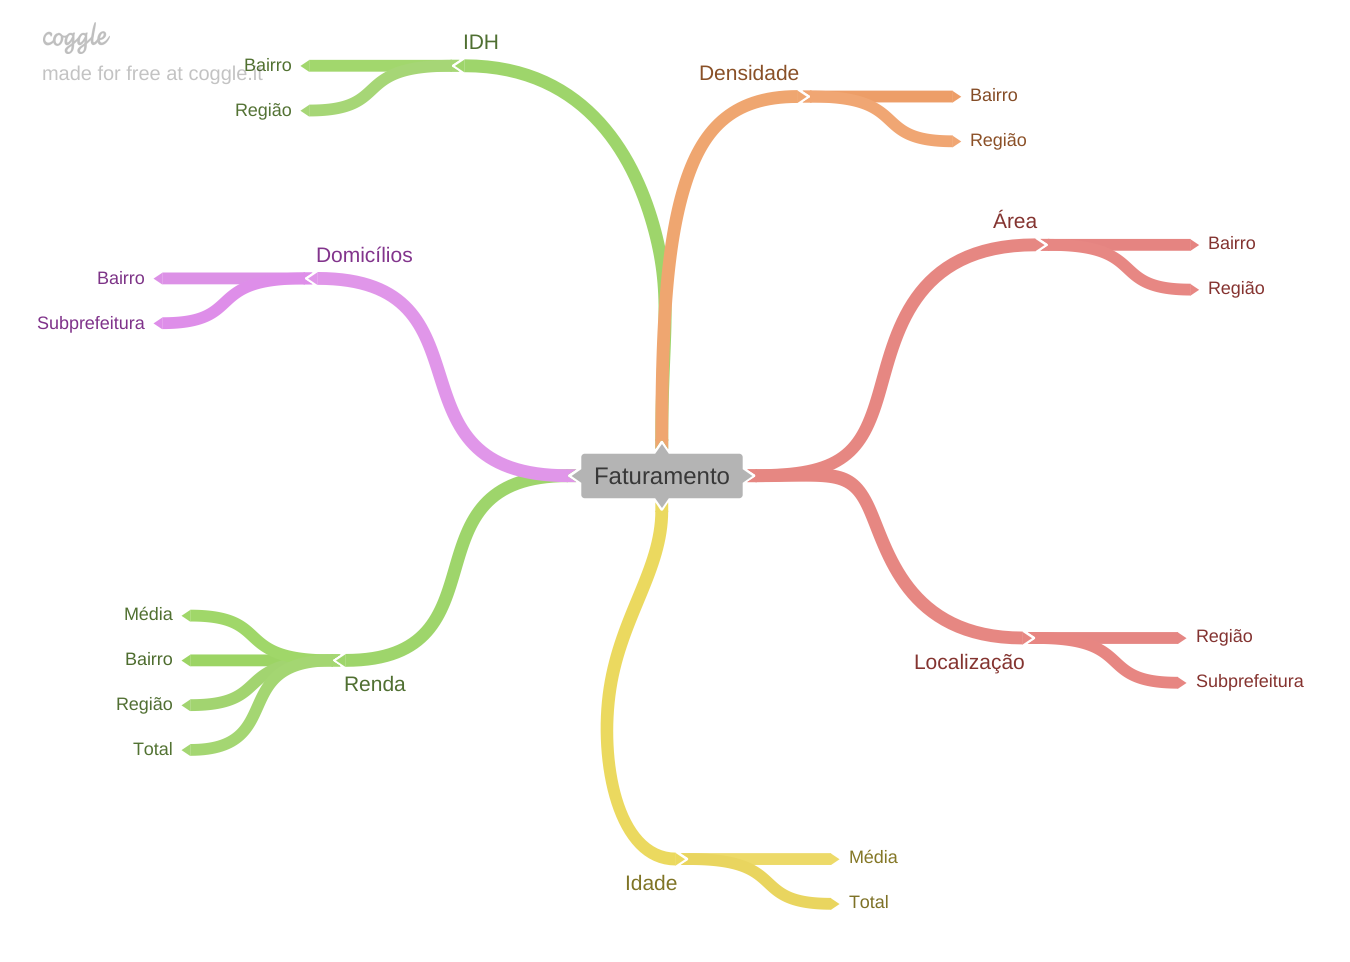

In [1463]:
Image('/home/tcbm/projs/case_geofusion/img/Faturamento.png')

## 2.2. Hipóteses

**H1.** IDH Bairro x Faturamento

**H2.** IDH por Subprefeitura x Faturamento

**H3.** Densidade Bairro x Faturamento

**H4.** Densidade por Subprefeitura x Faturamento

**H5.** Renda total Bairro x Faturamento

**H6.** Renda Média Bairro x Faturamento

**H7.** Renda total por Subprefeitura x Faturamento

**H8.** Renda Média por Subprefeitura x Faturamento

**H9.** Bairro x Faturamento

**H10.** Região Adm x Faturamento

**H11.** Subprefeitura x Faturamento

**H12.** Idade Total Bairro x Faturamento

**H13.** Idade Total Subprefeitura x Faturamento

**H14.** Domicílio Bairro x Faturamento

**H15.** Domicílio Subprefeitura x Faturamento

**H16.** População Absoluta Bairro x Faturamento

**H17.** População Absoluta Subprefeitura x Faturamento

## 2.3. Feature Engineering

### 2.3.1. IDH medio por subprefeitura

In [1464]:
aux_1 = df2[['idh', 'subprefeitura']].groupby('subprefeitura').mean().reset_index()
aux_1.columns = ['subprefeitura', 'idh_subprefeitura']
df2 = df2.merge(aux_1, how='inner', on='subprefeitura')

### População Subprefeitura

In [1465]:
aux_2 = df2[['população', 'subprefeitura']].groupby('subprefeitura').sum().reset_index()
aux_2.columns = ['subprefeitura', 'população_subprefeitura']
df2 = df2.merge(aux_2, how='inner', on='subprefeitura')

### 2.3.5. Densidade Subprefeitura -> densidade = pop / area - 

In [1466]:
aux_3 = df2[['area', 'subprefeitura']].groupby('subprefeitura').sum().reset_index()
aux_3.columns = ['subprefeitura', 'area_subprefeitura']
df2 = df2.merge(aux_3, how='inner', on='subprefeitura')

df2['densidade_subprefeitura'] = df2['população_subprefeitura'] / df2['area_subprefeitura']

df2 = df2.drop('area_subprefeitura', axis=1)

### 2.3.4. Densidade Bairro -> densidade = pop / area 

In [1467]:
df2['densidade_bairro'] = df2['população'] / df2['area']

df2 = df2.drop('area', axis=1)

### 2.3.6. Renda total Bairro

In [1468]:
df2['renda_abs_bairro'] = df2['renda_media'] * df2['população']

### 2.3.7 .Renda media Subprefeitura

In [1469]:
aux_4 = df2.loc[:, ['nome', 'subprefeitura', 'renda_media', 'população', 'população_subprefeitura']]
aux_4['pond'] = aux_4['renda_media'] * aux_4['população'] / aux_4['população_subprefeitura']
df_merge_aux = aux_4[['pond', 'subprefeitura']].groupby('subprefeitura').sum().reset_index()
df_merge_aux.columns = ['subprefeitura', 'renda_media_subprefeitura']
df2 = df2.merge(df_merge_aux, how='inner', on='subprefeitura')

### 2.3.10. Domicílios percentuais por bairro

In [1470]:
# total domicilios
df2['total_domicilios'] = (df2['domicilios_a1'] + df2['domicilios_a2'] +
                               df2['domicilios_b1'] + df2['domicilios_b2'] +
                               df2['domicilios_c1'] + df2['domicilios_c2'] +
                               df2['domicilios_d'] + df2['domicilios_e'])

# percent
df2['percent_domicilios_a1'] = df2['domicilios_a1'] / df2['total_domicilios']
df2['percent_domicilios_a2'] = df2['domicilios_a2'] / df2['total_domicilios']
df2['percent_domicilios_b1'] = df2['domicilios_b1'] / df2['total_domicilios']
df2['percent_domicilios_b2'] = df2['domicilios_b2'] / df2['total_domicilios']
df2['percent_domicilios_c1'] = df2['domicilios_c1'] / df2['total_domicilios']
df2['percent_domicilios_c2'] = df2['domicilios_c2'] / df2['total_domicilios']
df2['percent_domicilios_d'] = df2['domicilios_d'] / df2['total_domicilios']
df2['percent_domicilios_e'] = df2['domicilios_e'] / df2['total_domicilios']

df2 = df2.drop(['domicilios_a1', 'domicilios_a2', 'domicilios_b1', 
                'domicilios_b2', 'domicilios_c1', 'domicilios_c2',
                'domicilios_d', 'domicilios_e'], axis=1)

###  2.3.15. percent_idade_bairro

In [1471]:
df2['percent_pop_ate9'] = df2['pop_ate9'] / df2['população']
df2['percent_pop_de10a14'] = df2['pop_de10a14'] / df2['população']
df2['percent_pop_de15a19'] = df2['pop_de15a19'] / df2['população']
df2['percent_pop_de20a24'] = df2['pop_de20a24'] / df2['população']
df2['percent_pop_de25a34'] = df2['pop_de25a34'] / df2['população']
df2['percent_pop_de35a49'] = df2['pop_de35a49'] / df2['população']
df2['percent_pop_de50a59'] = df2['pop_de50a59'] / df2['população']
df2['percent_pop_mais_de60'] = df2['pop_mais_de60'] / df2['população']

df2 = df2.drop(['pop_ate9', 'pop_de10a14', 'pop_de15a19', 'pop_de20a24',
                'pop_de25a34', 'pop_de35a49', 'pop_de50a59', 'pop_mais_de60'], axis=1)

# 3.0. Exploratory Data Analysis

In [1472]:
df3 = df2.copy()

## 3.1. Análise Univariada

### 3.1.1. Variável Resposta

<AxesSubplot:xlabel='faturamento', ylabel='Count'>

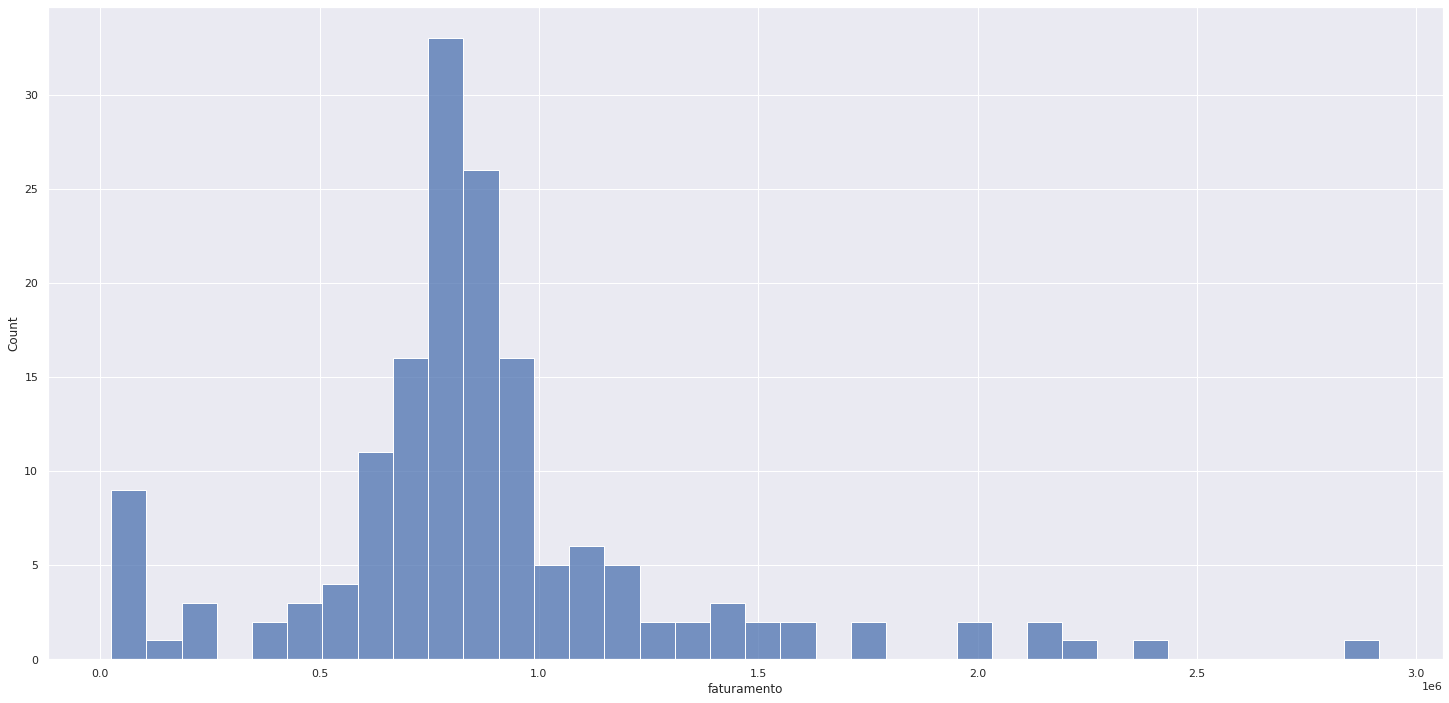

In [1473]:
sns.histplot(df2['faturamento'])

### 3.1.2. Variáveis Numéricas

In [1474]:
num_attributes = df3.select_dtypes(exclude='object')


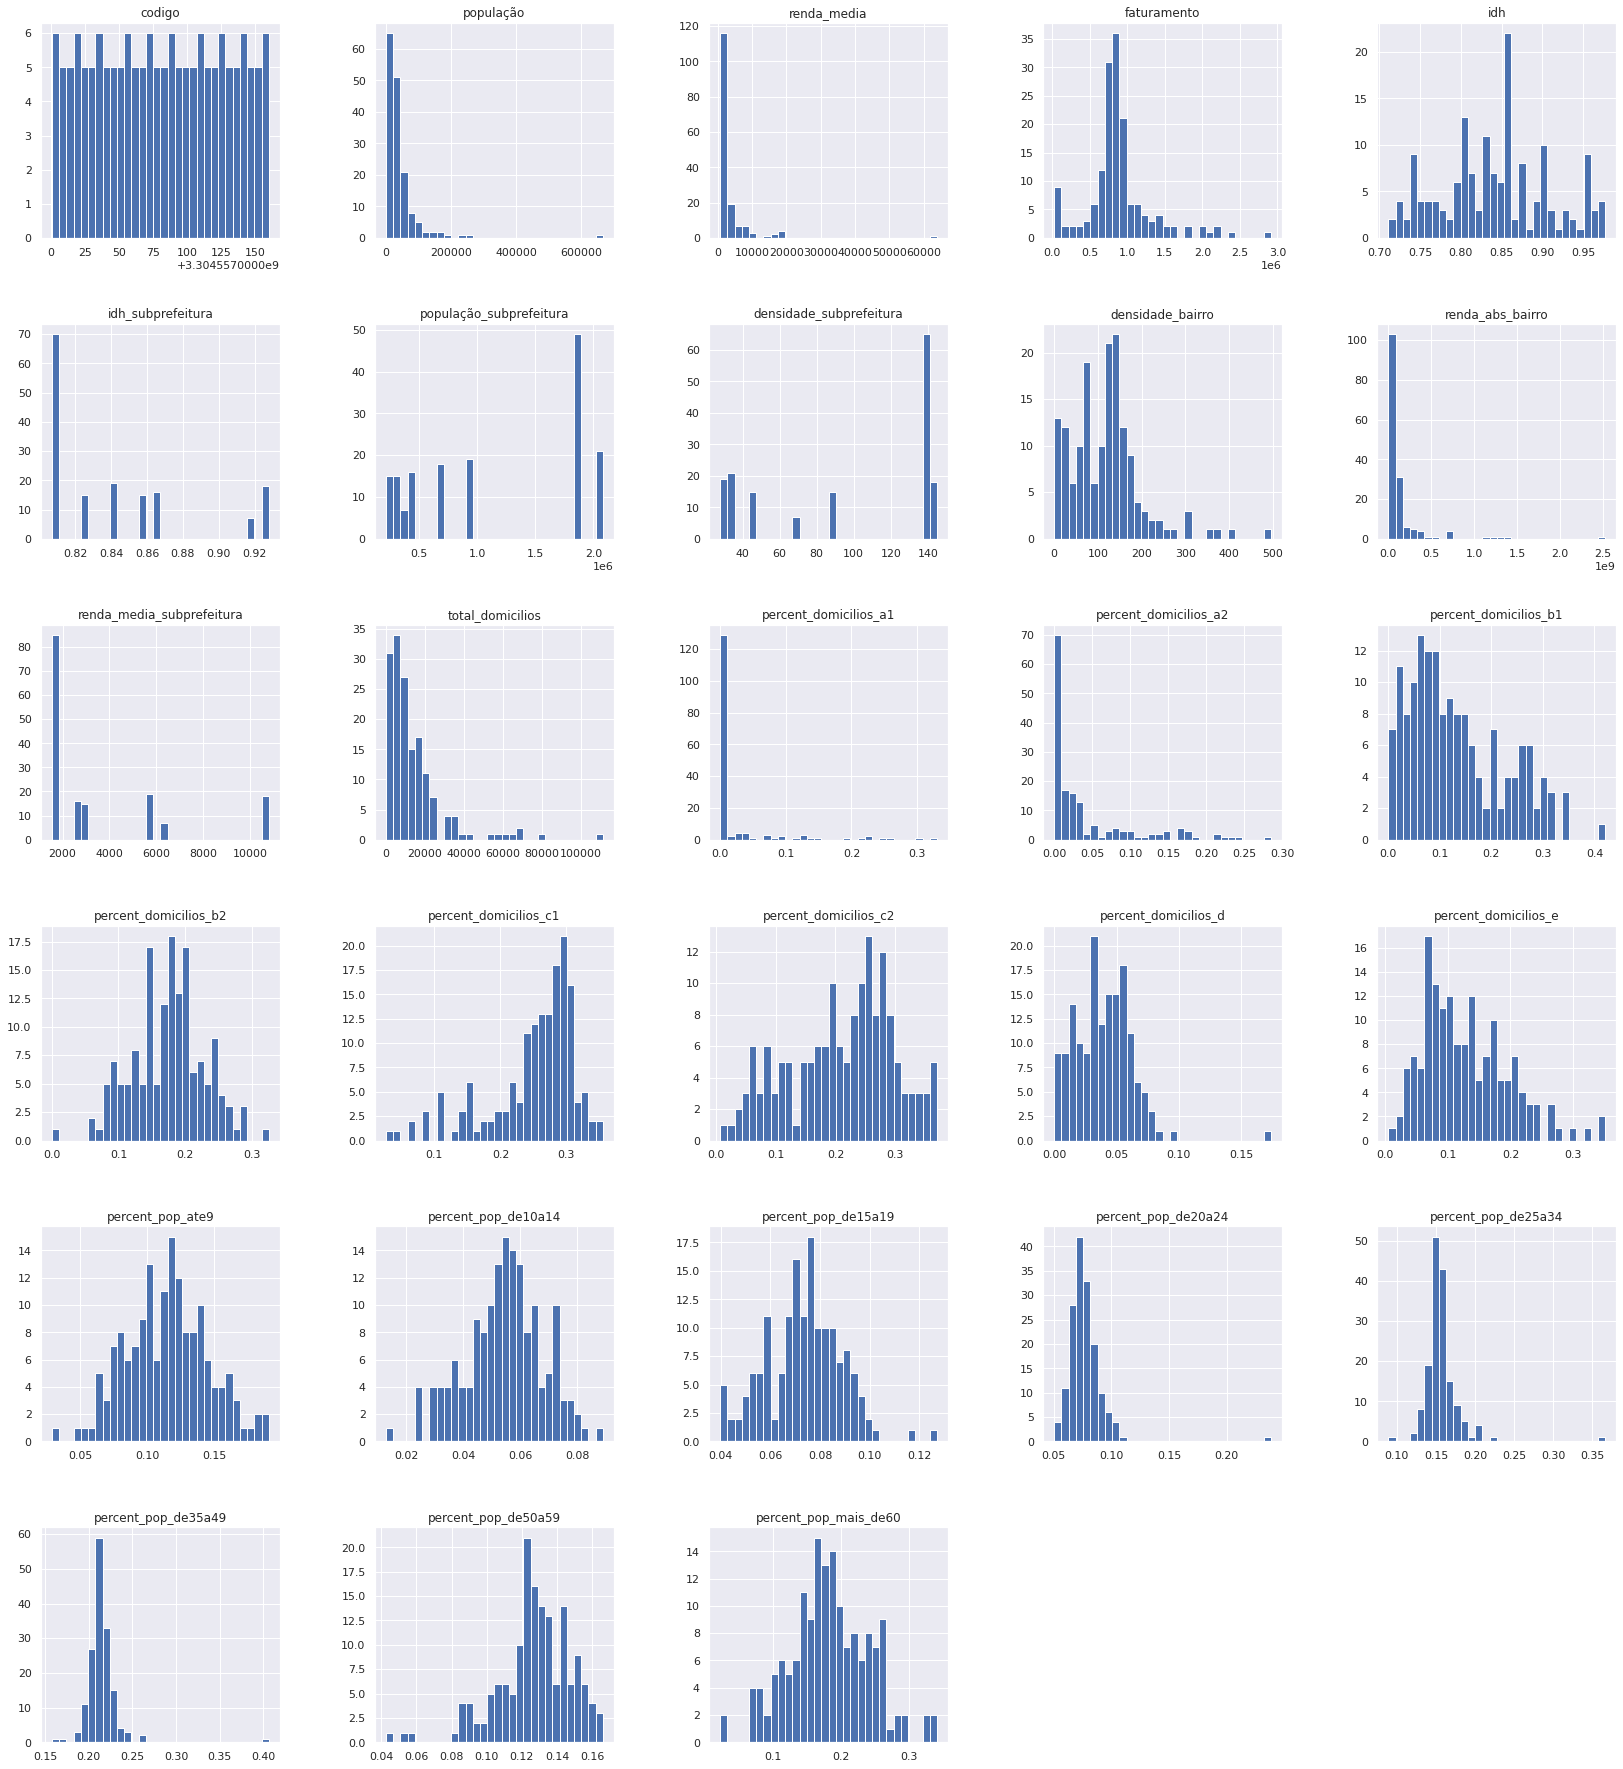

In [1475]:
num_attributes.hist(bins=30);
plt.subplots_adjust(left=0.125,
                    bottom=0.01, 
                    right=1, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.40)

### 3.1.3. Variáveis Categórica

In [1476]:
cat_attributes = df3.select_dtypes(include='object')

<AxesSubplot:xlabel='subprefeitura', ylabel='faturamento'>

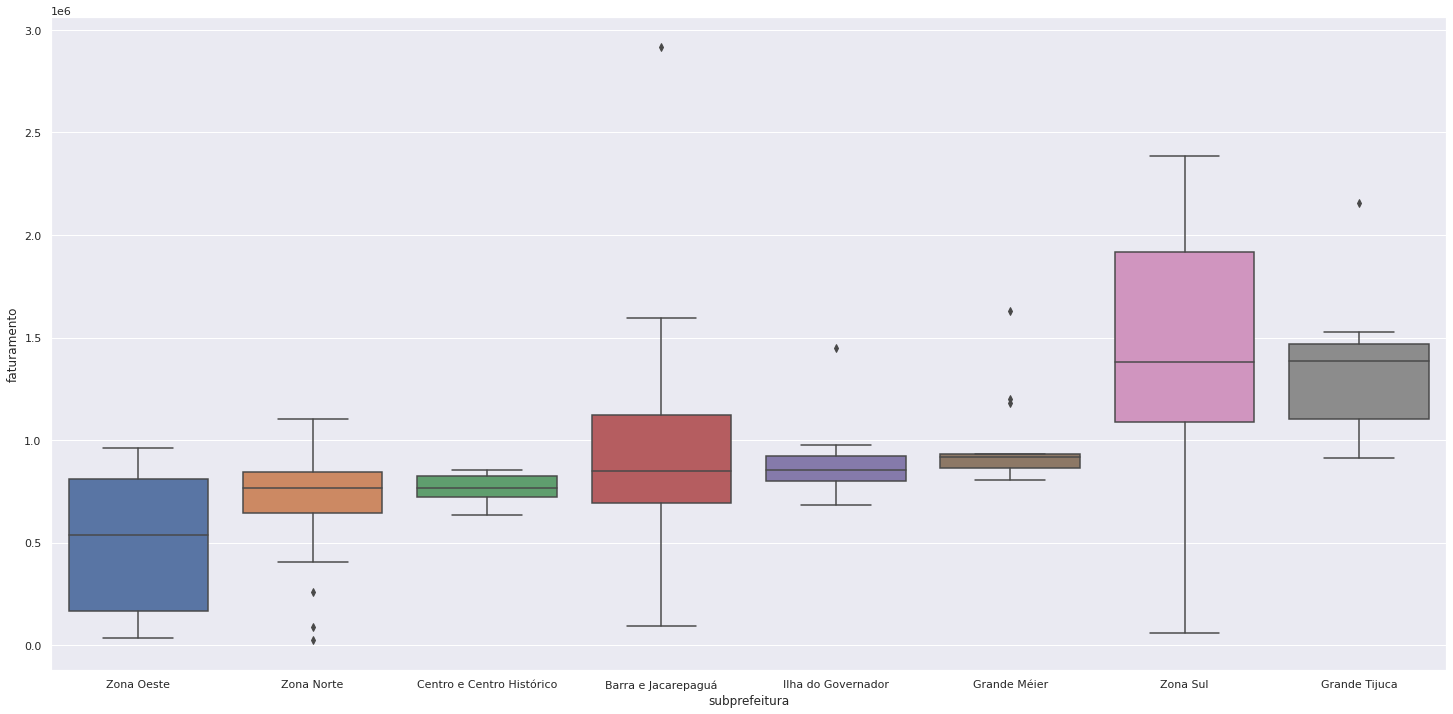

In [1477]:
# Criando um df auxiliar para agrupar os valores pela mediana
aux = df1[['subprefeitura', 'faturamento']].groupby('subprefeitura').median().reset_index().sort_values(by = 'faturamento',
                                                                                                        ascending=True)
# plot boxplot
sns.boxplot(x='subprefeitura', y='faturamento', data=df1, order = aux['subprefeitura'].to_list())

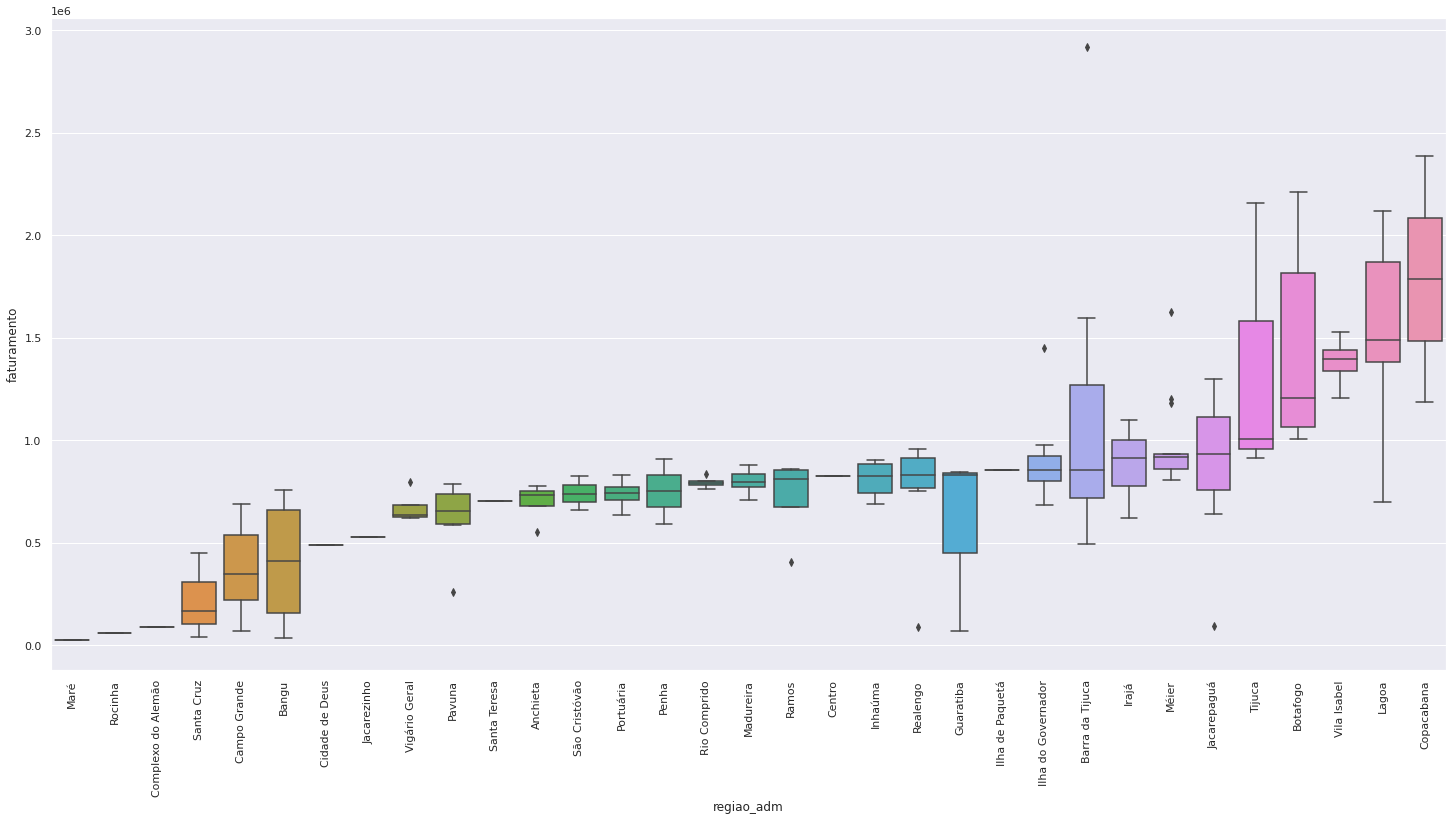

In [1478]:
# Criando um df auxiliar para agrupar os valores pela mediana
aux = df1[['regiao_adm', 'faturamento']].groupby('regiao_adm').median().reset_index().sort_values(by = 'faturamento',
                                                                                                        ascending=True)
# plot boxplot
sns.boxplot(x='regiao_adm', y='faturamento', data=df1, order = aux['regiao_adm'].to_list())

plt.xticks(rotation=90);

## 3.2. Análise Bivariada

### H1. IDH Bairro x Faturamento
- o IDH do bairro e o Faturamento possuem boa correlação;
- IDH's mais elevados dos bairros são acompanhados, em boa parte dos casos, de maiores faturamentos.

In [1479]:
# criando auxiliar para plotar categorias de idh por faturamento
aux = df3.loc[:, ['idh', 'faturamento']]
aux['idh'] = pd.cut(df3['idh'], bins=5)
aux_2 = aux.groupby('idh').mean().reset_index()

<AxesSubplot:>

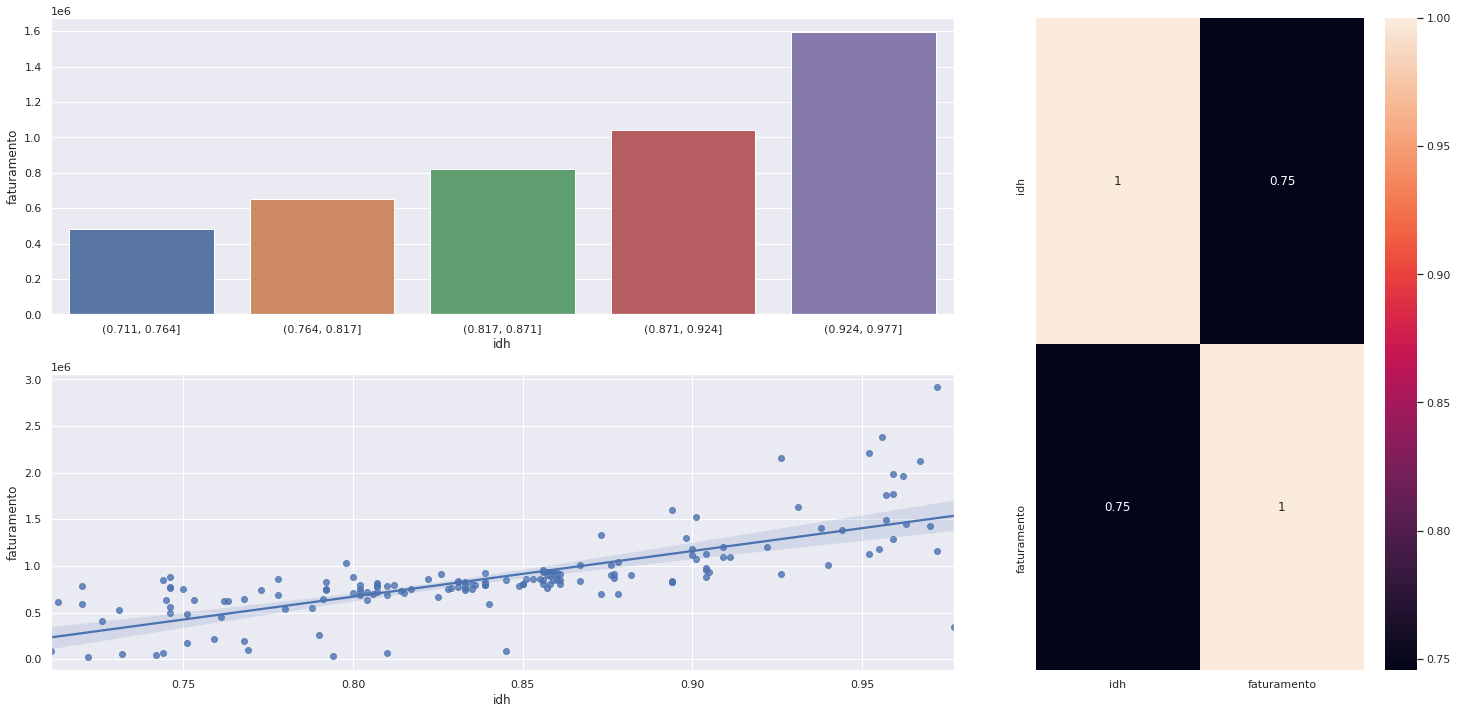

In [1480]:
grid = plt.GridSpec(2, 3)

plt.subplot(grid[0, :2])
# plot barplot categorias
sns.barplot(x='idh', y='faturamento', data=aux_2)

plt.subplot(grid[1, :2])
# plot regressão entre idh e faturamento
sns.regplot(x='idh', y='faturamento', data=df3)

plt.subplot(grid[:, 2])
# plot correlacao entre as variáveis idh e faturamentop
sns.heatmap(df3[['idh', 'faturamento']].corr(method='pearson'), annot=True)

### H2. IDH por Subprefeitura x Faturamento
- o IDH da Subprefeitura e o Faturamento possuem uma correlação interessante;
- IDH's mais elvados das Subprefeituras são acompanhados, em boa parte dos casos, de maiores faturamentos.

In [1481]:
# criando auxiliar para plotar categorias de idh por faturamento
aux = df3.loc[:, ['idh_subprefeitura', 'faturamento']]
aux['idh_subprefeitura'] = pd.cut(df3['idh_subprefeitura'], bins=3)
aux_2 = aux.groupby('idh_subprefeitura').mean().reset_index()

<AxesSubplot:>

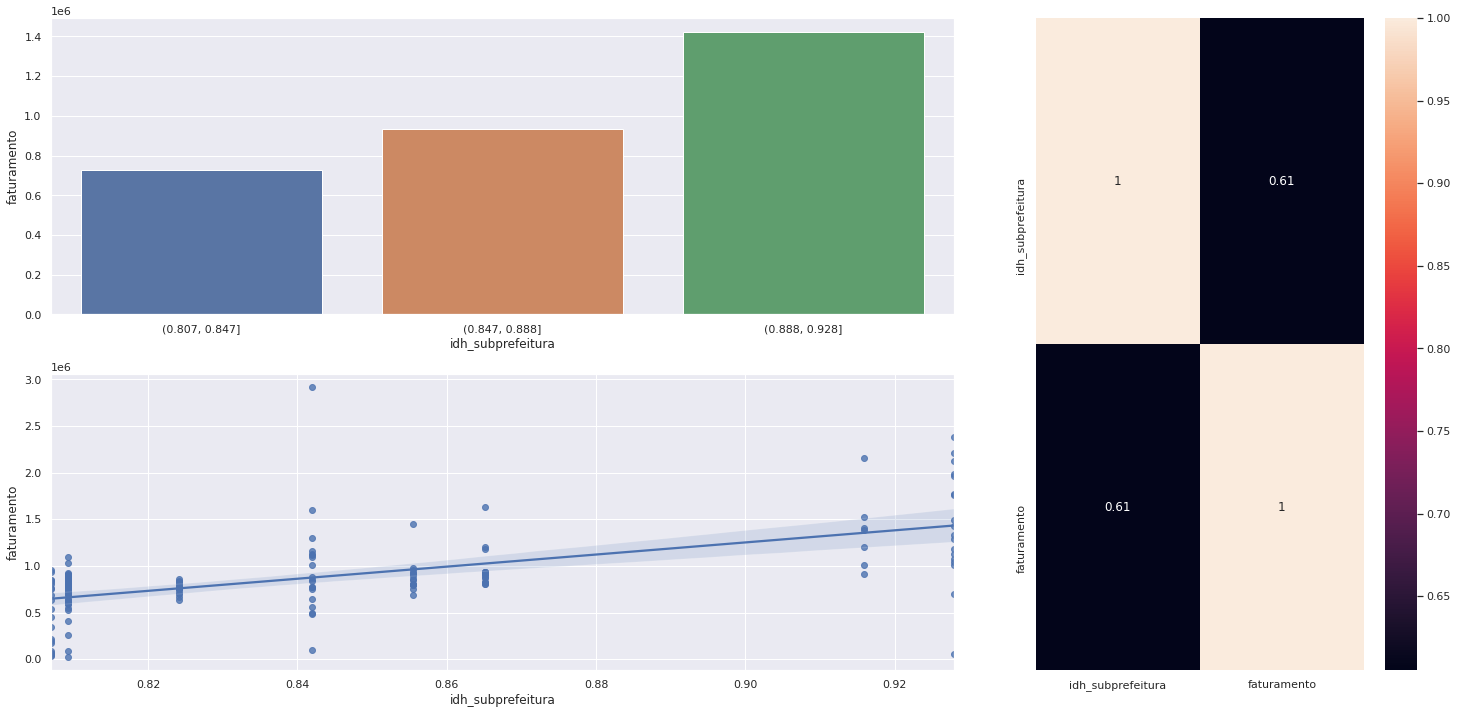

In [1482]:
grid = plt.GridSpec(2, 3)

plt.subplot(grid[0, :2])
# plot barplot categorias
sns.barplot(x='idh_subprefeitura', y='faturamento', data=aux_2)

plt.subplot(grid[1, :2])
# plot regressão entre idh e faturamento
sns.regplot(x='idh_subprefeitura', y='faturamento', data=df3)

plt.subplot(grid[:, 2])
# plot correlacao entre as variáveis idh e faturamento
sns.heatmap(df3[['idh_subprefeitura', 'faturamento']].corr(method='pearson'), annot=True)

### **H3.** Densidade Bairro x Faturamento
 - A Densidade do Bairro e o Faturamento possuem uma baixa correlação.

In [1483]:
# criando auxiliar para plotar categorias de idh por faturamento
aux = df3.loc[:, ['densidade_bairro', 'faturamento']]
aux['densidade_bairro'] = pd.cut(df3['densidade_bairro'], bins=3)
aux_2 = aux.groupby('densidade_bairro').mean().reset_index()

<AxesSubplot:>

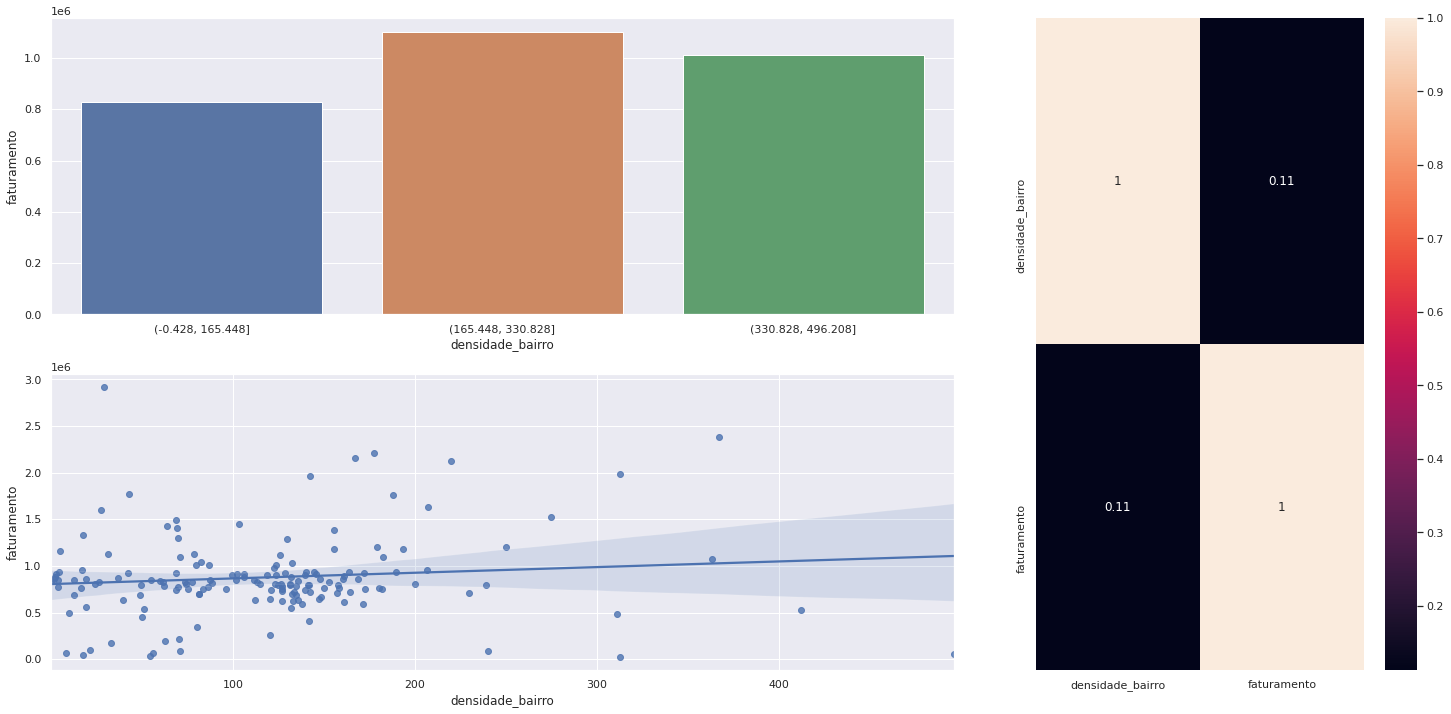

In [1484]:
grid = plt.GridSpec(2, 3)

plt.subplot(grid[0, :2])
# plot barplot categorias
sns.barplot(x='densidade_bairro', y='faturamento', data=aux_2)

plt.subplot(grid[1, :2])
# plot regressão entre idh e faturamento
sns.regplot(x='densidade_bairro', y='faturamento', data=df3)

plt.subplot(grid[:, 2])
# plot correlacao entre as variáveis idh e faturamento
sns.heatmap(df3[['densidade_bairro', 'faturamento']].corr(method='pearson'), annot=True)

### H4. Densidade por Subprefeitura x Faturamento
 - A Densidade da Subprefeitura e o Faturamento possuem uma baixa correlação.

In [1485]:
# criando auxiliar para plotar categorias de idh por faturamento
aux = df3.loc[:, ['densidade_subprefeitura', 'faturamento']]
aux['densidade_subprefeitura'] = pd.cut(df3['densidade_subprefeitura'], bins=3)
aux_2 = aux.groupby('densidade_subprefeitura').mean().reset_index()

<AxesSubplot:>

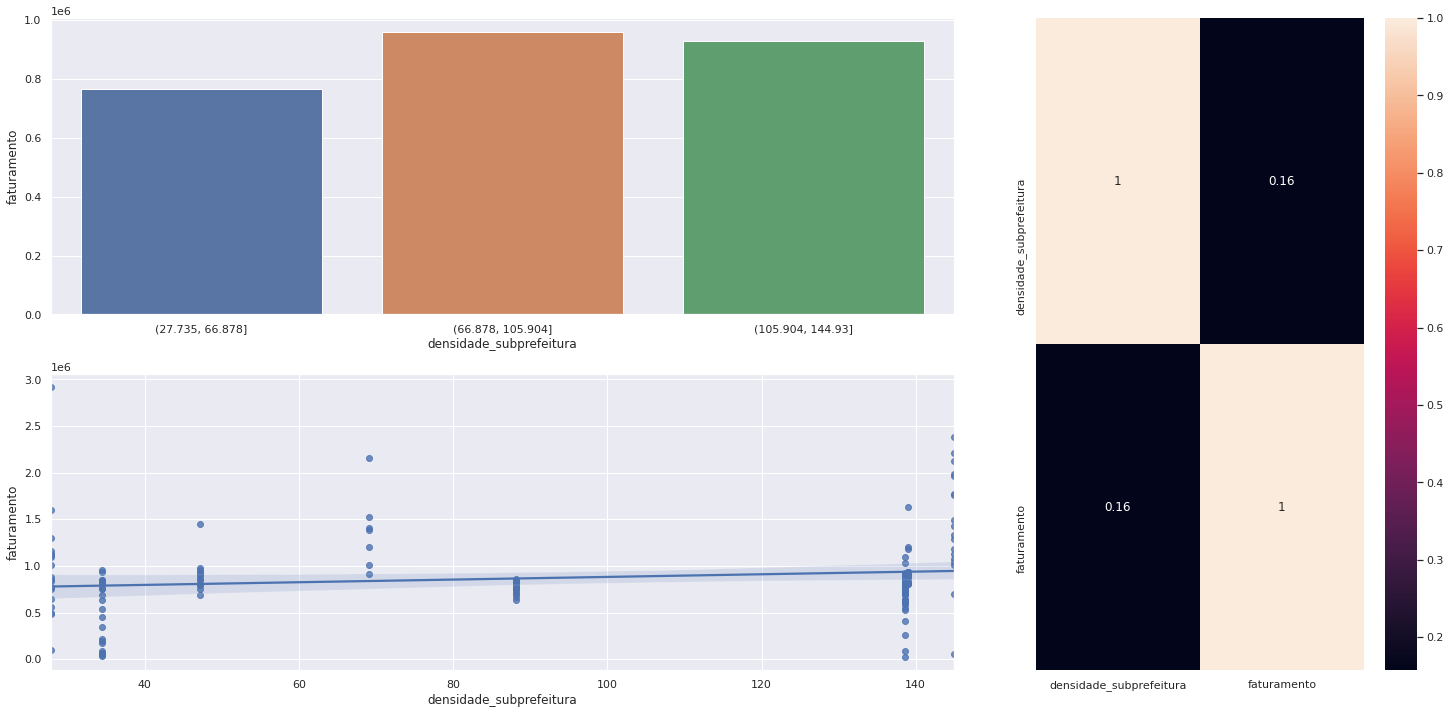

In [1486]:
grid = plt.GridSpec(2, 3)

plt.subplot(grid[0, :2])
# plot barplot categorias
sns.barplot(x='densidade_subprefeitura', y='faturamento', data=aux_2)

plt.subplot(grid[1, :2])
# plot regressão entre idh e faturamento
sns.regplot(x='densidade_subprefeitura', y='faturamento', data=df3)

plt.subplot(grid[:, 2])
# plot correlacao entre as variáveis idh e faturamento
sns.heatmap(df3[['densidade_subprefeitura', 'faturamento']].corr(method='pearson'), annot=True)

### H5. Renda total Bairro x Faturamento
- Existe alguma correlação entre a Renda total do Bairro e o faturamento;
- Valores altos de renda(que são outliers) possuem valores de faturamento superior.

In [1487]:
# Selecionando valores inferiores aos outliers
aux_1 = df3.loc[df3['renda_abs_bairro'] < 300000000, :]

<AxesSubplot:>

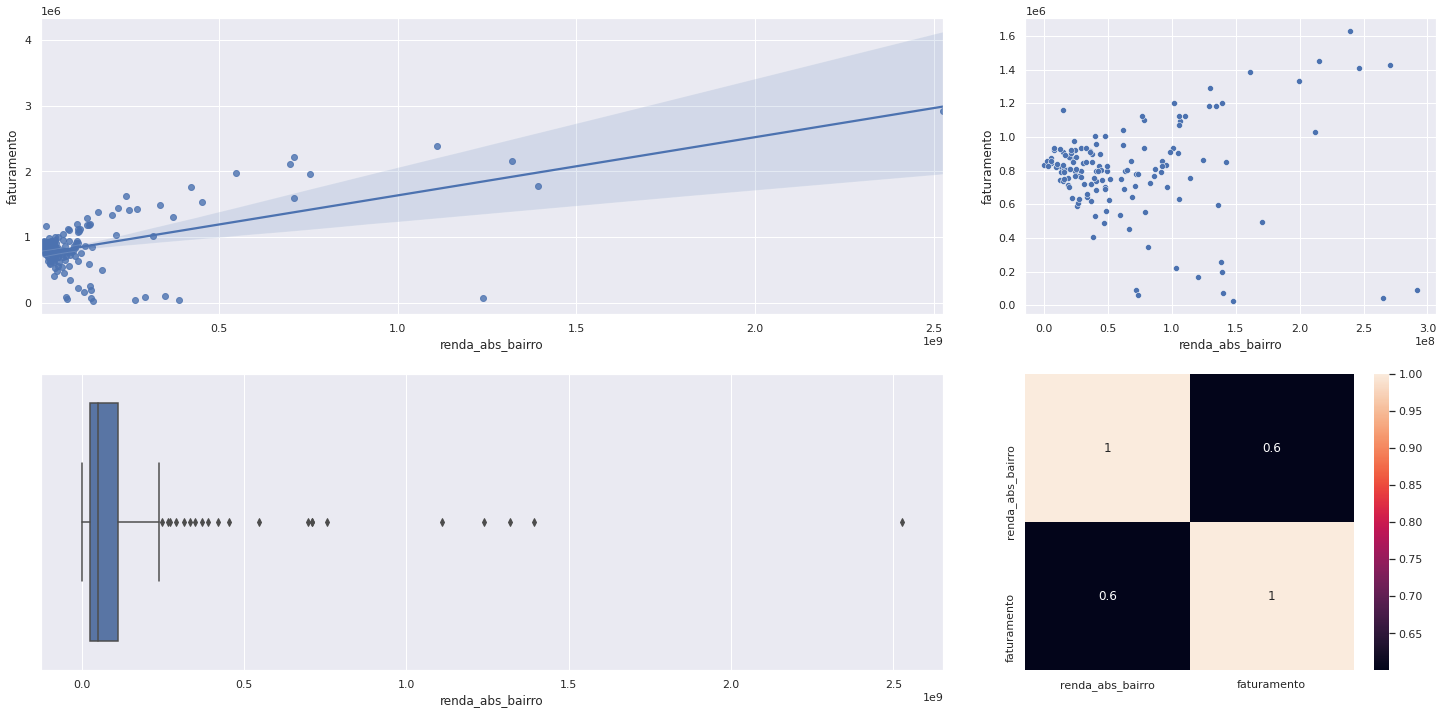

In [1488]:
grid = plt.GridSpec(2, 3)

plt.subplot(grid[0, :2])
# plot regressão incluindo outliers
sns.regplot(x='renda_abs_bairro', y='faturamento', data=df3)

plt.subplot(grid[1, :2])
# plot boxplot renda absoluta
sns.boxplot(x = df3['renda_abs_bairro'])

plt.subplot(grid[0, 2])
# plot scatterplot renda absoluta sem outliers
sns.scatterplot(x='renda_abs_bairro', y='faturamento', data=aux_1)

plt.subplot(grid[1, 2])
# plot heatmap de correlação
sns.heatmap(df3[['renda_abs_bairro', 'faturamento']].corr(method='pearson'), annot=True)

### H6. Renda Média Bairro x Faturamento
- Existe alguma correlação entre a Renda média do Bairro e o faturamento;
- Valores altos de renda possuem valores de faturamento superior.

In [1489]:
# Selecionando valores inferiores aos outliers
aux_1 = df3.loc[df3['renda_abs_bairro'] < 300000000, :]

<AxesSubplot:>

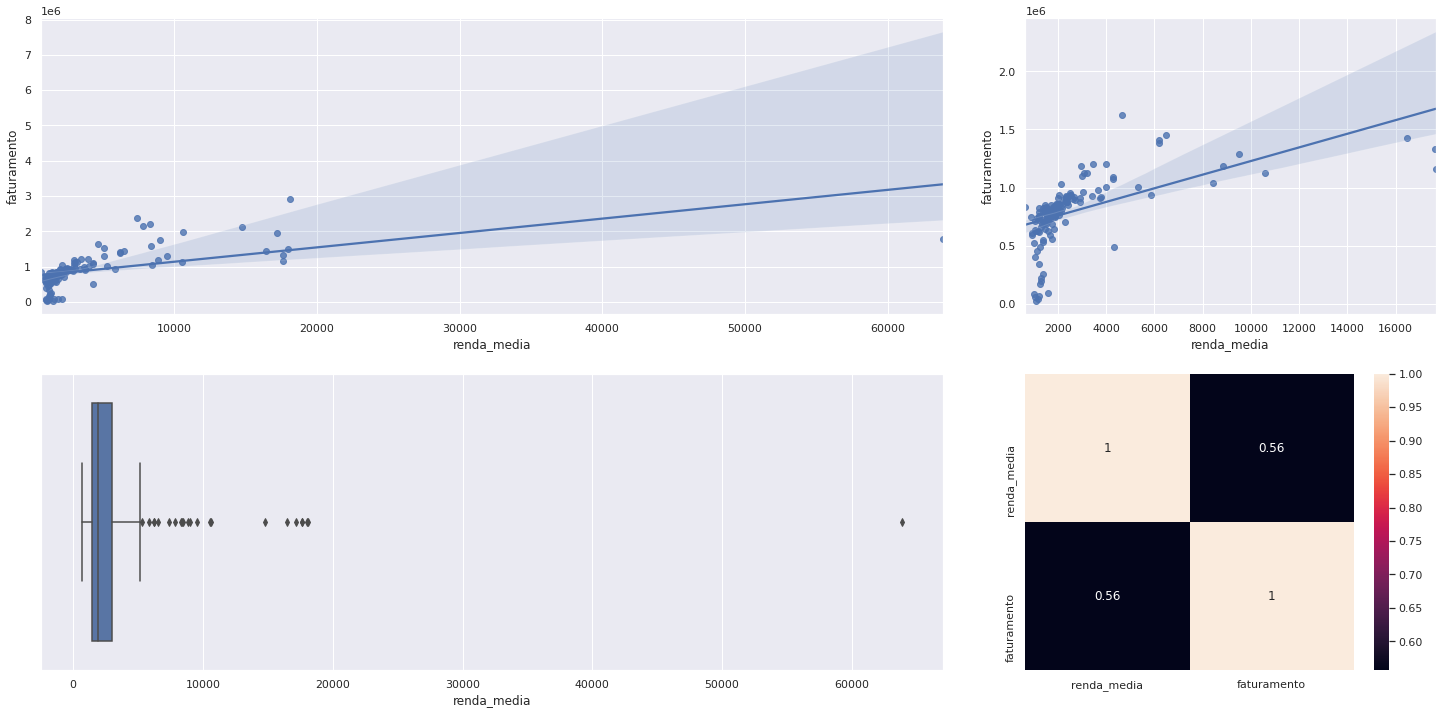

In [1490]:
grid = plt.GridSpec(2, 3)

plt.subplot(grid[0, :2])
# plot regressão incluindo outliers
sns.regplot(x='renda_media', y='faturamento', data=df3)

plt.subplot(grid[1, :2])
# plot boxplot renda absoluta
sns.boxplot(x = df3['renda_media'])

plt.subplot(grid[0, 2])
# plot scatterplot renda absoluta sem outliers
sns.regplot(x='renda_media', y='faturamento', data=aux_1)

plt.subplot(grid[1, 2])
# plot heatmap de correlação
sns.heatmap(df3[['renda_media', 'faturamento']].corr(method='pearson'), annot=True)

### H7. Renda total por Subprefeitura x Faturamento
- A correlação entre a Renda bruta por subprefeitura e o faturamento é mínima.

In [1491]:
df3['renda_abs_subprefeitura'] = df3['renda_media_subprefeitura'] * df3['população_subprefeitura']

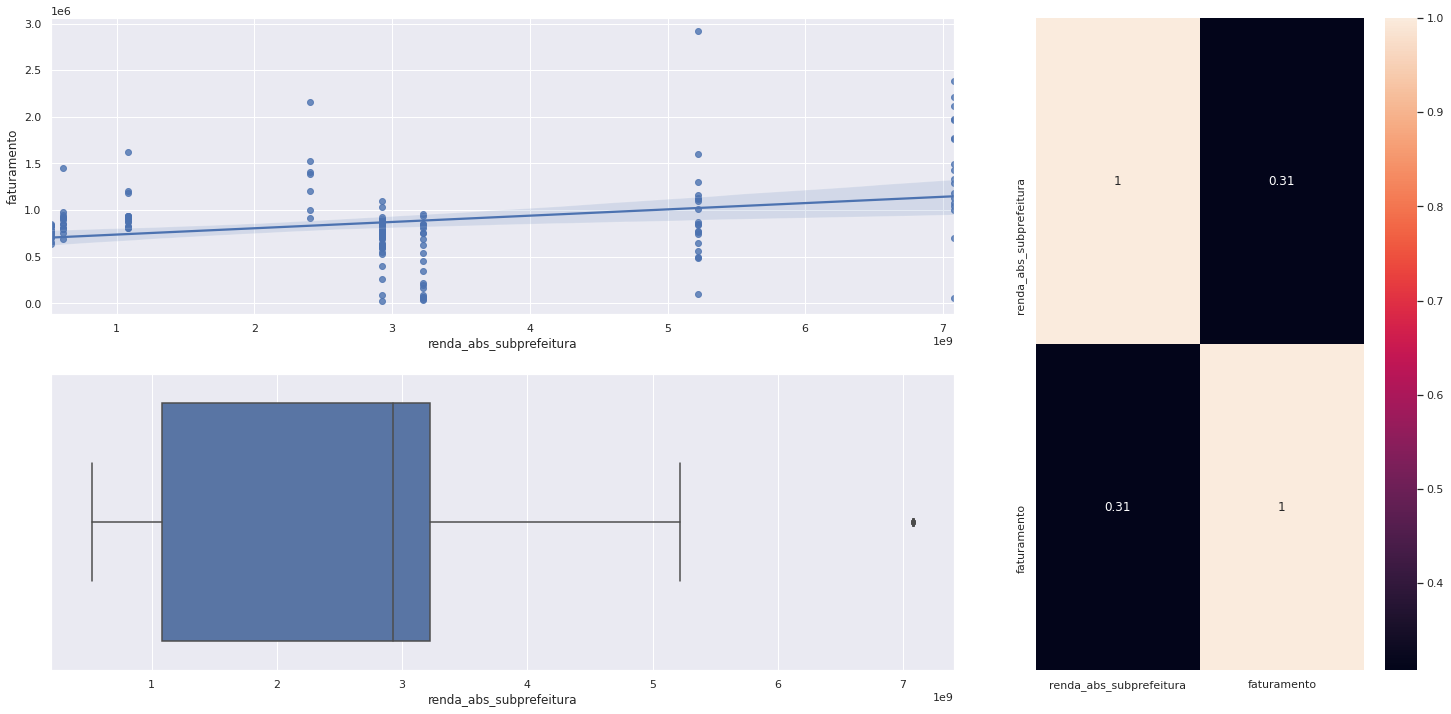

In [1492]:
grid = plt.GridSpec(2, 3)

plt.subplot(grid[0, :2])
# plot regressão incluindo
sns.regplot(x='renda_abs_subprefeitura', y='faturamento', data=df3)

plt.subplot(grid[1, :2])
# plot boxplot renda absoluta
sns.boxplot(x = df3['renda_abs_subprefeitura'])

plt.subplot(grid[:, 2])
# plot heatmap de correlação
sns.heatmap(df3[['renda_abs_subprefeitura', 'faturamento']].corr(method='pearson'), annot=True)

df3 = df3.drop('renda_abs_subprefeitura', axis=1)

### H8. Renda Média por Subprefeitura x Faturamento
- Existe alguma correlação entre a Renda média da subprefeitura e o faturamento;
- Valores altos de renda possuem valores de faturamento superior.

<AxesSubplot:>

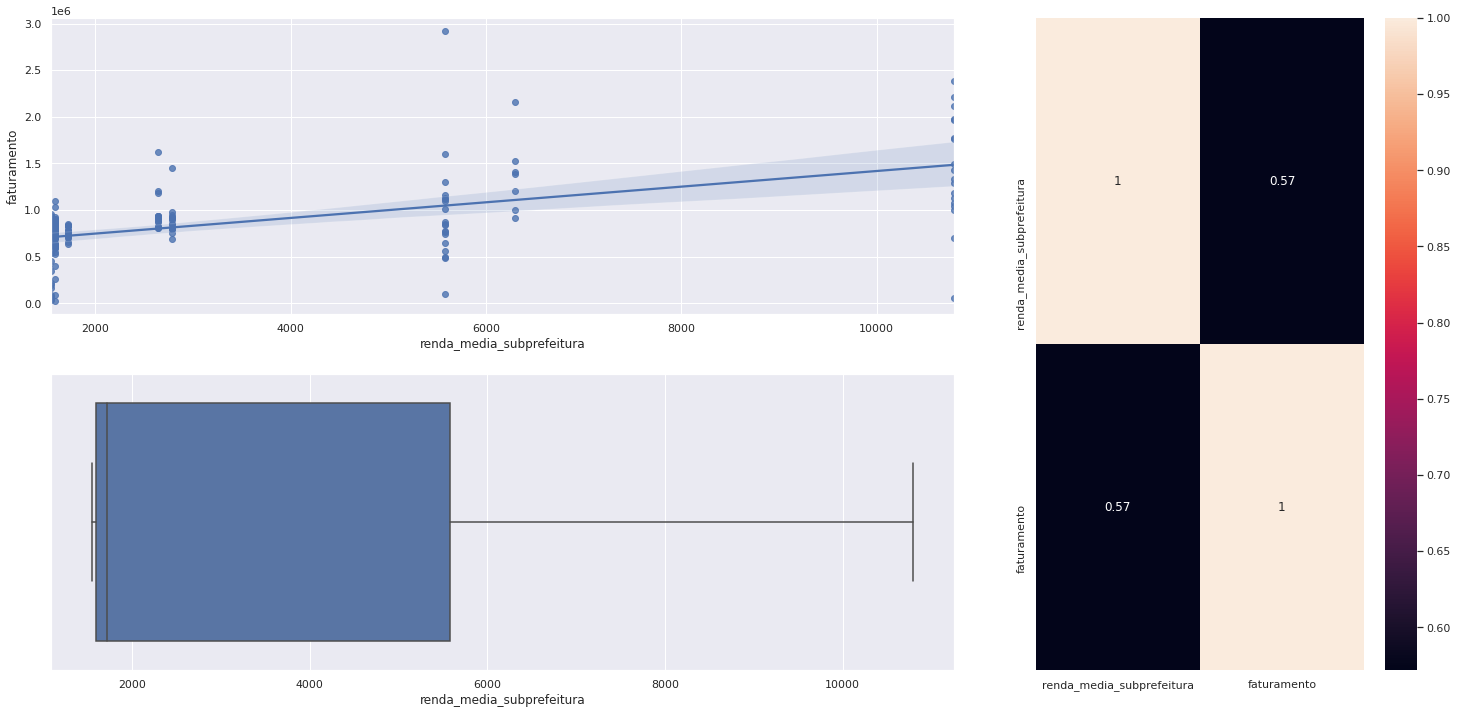

In [1493]:
grid = plt.GridSpec(2, 3)

plt.subplot(grid[0, :2])
# plot regressão incluindo
sns.regplot(x='renda_media_subprefeitura', y='faturamento', data=df3)

plt.subplot(grid[1, :2])
# plot boxplot renda absoluta
sns.boxplot(x = df3['renda_media_subprefeitura'])

plt.subplot(grid[:, 2])
# plot heatmap de correlação
sns.heatmap(df3[['renda_media_subprefeitura', 'faturamento']].corr(method='pearson'), annot=True)

### H9. Bairro x Faturamento - Top 10 Faturamentos - Bairros

In [1494]:
aux = df3.sort_values(by='faturamento', ascending=True).iloc[-10:, :]

<AxesSubplot:xlabel='nome', ylabel='faturamento'>

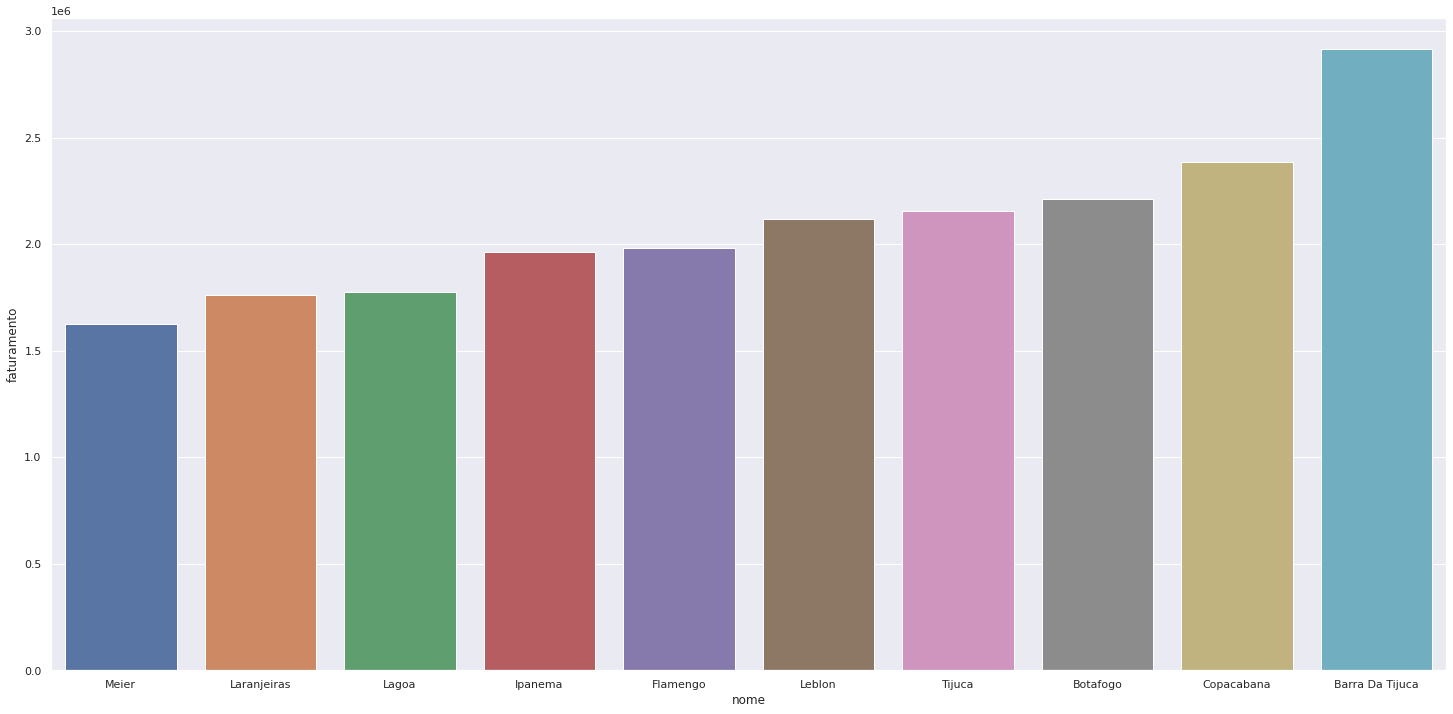

In [1495]:
sns.barplot(x='nome', y='faturamento', data=aux)

### H10. Região Adm x Faturamento - Top 10 Faturamentos - Região Administrativa

In [1496]:
# Regioes com maior faturamento - Absoluto
aux = df3[['regiao_adm', 'faturamento']].groupby('regiao_adm').sum().sort_values(by='faturamento').reset_index()
aux_2 = aux.loc[23:, :]

# Regioes com maior faturamento - Mediana
aux_3 = df3[['regiao_adm', 'faturamento']].groupby('regiao_adm').median().sort_values(by='faturamento').reset_index()
aux_4 = aux_3.loc[23:, :]

Text(0.5, 1.0, 'Top 10 Faturamento Mediano por Região Administrativa')

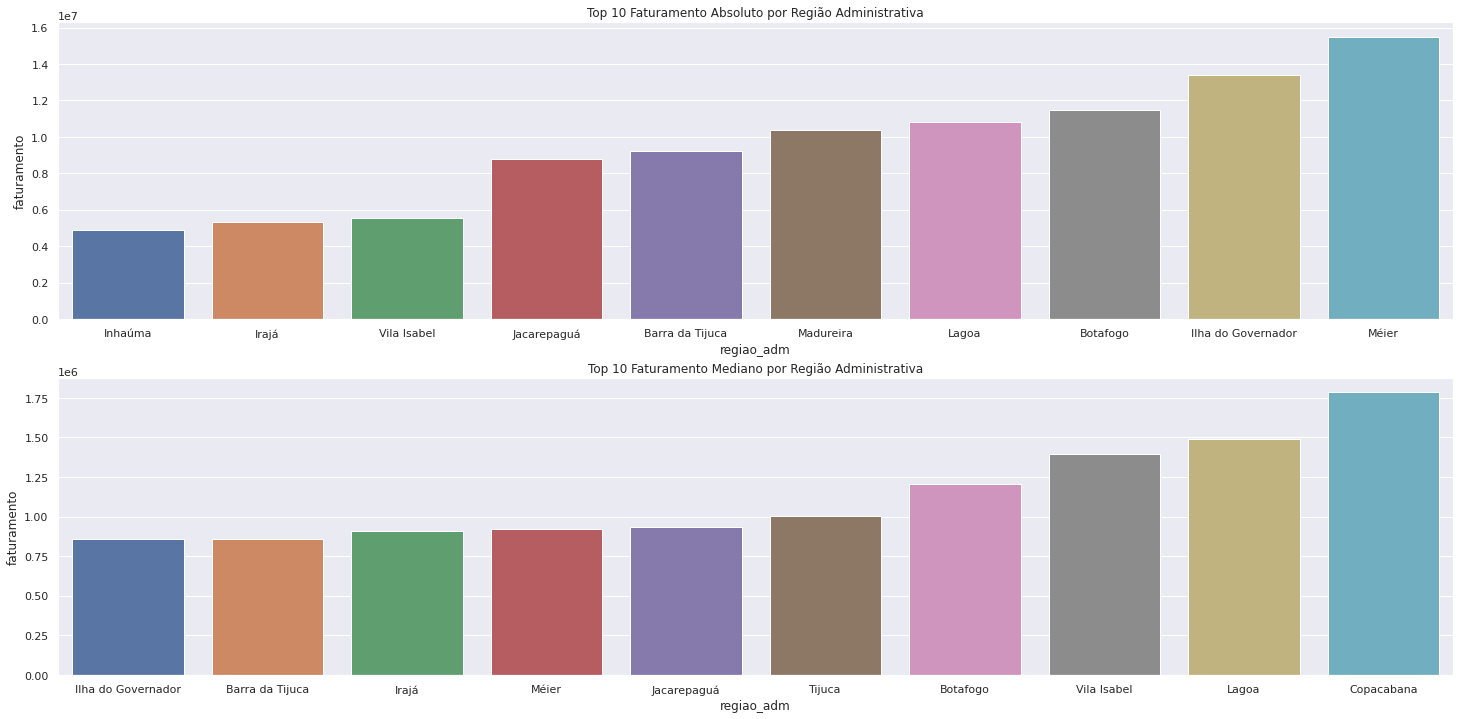

In [1497]:
grid = plt.GridSpec(2, 1)

plt.subplot(grid[0, 0])
# plot rank de faturamento absoluto
sns.barplot(x='regiao_adm', y='faturamento', data=aux_2)
plt.title('Top 10 Faturamento Absoluto por Região Administrativa')

plt.subplot(grid[1, 0])
# plot rank de faturamento mediano
sns.barplot(x='regiao_adm', y='faturamento', data=aux_4)
plt.title('Top 10 Faturamento Mediano por Região Administrativa')

### H11. Subprefeitura x Faturamento Top 10 Faturamentos - Subprefeitura

In [1498]:
# Regioes com maior faturamento - Absoluto
aux = df3[['subprefeitura', 'faturamento']].groupby('subprefeitura').sum().sort_values(by='faturamento').reset_index()

# Regioes com maior faturamento - Mediana
aux_2 = df3[['subprefeitura', 'faturamento']].groupby('subprefeitura').median().sort_values(by='faturamento').reset_index()

Text(0.5, 1.0, 'Top 10 Faturamento Mediano por Subprefeitura')

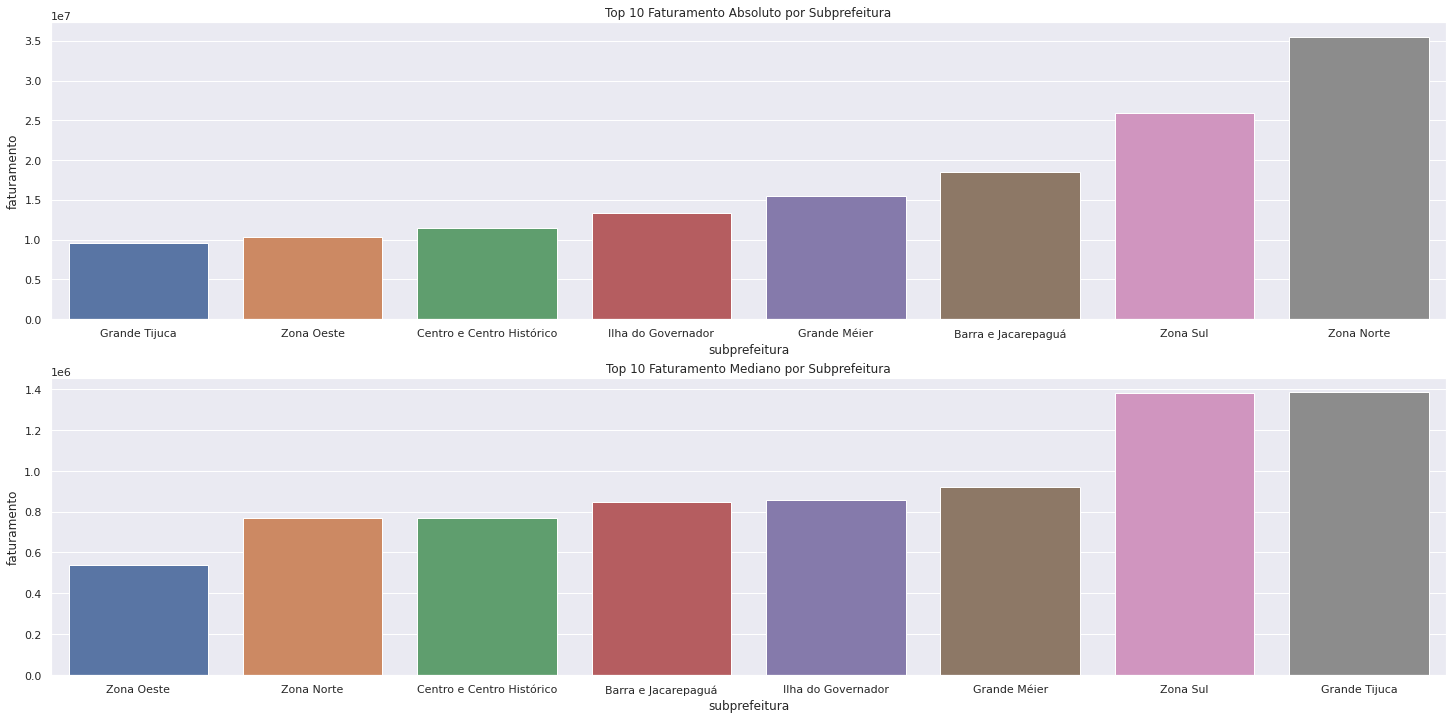

In [1499]:
grid = plt.GridSpec(2, 1)

plt.subplot(grid[0, 0])
# plot rank de faturamento absoluto
sns.barplot(x='subprefeitura', y='faturamento', data=aux)
plt.title('Top 10 Faturamento Absoluto por Subprefeitura')

plt.subplot(grid[1, 0])
# plot rank de faturamento mediano
sns.barplot(x='subprefeitura', y='faturamento', data=aux_2)
plt.title('Top 10 Faturamento Mediano por Subprefeitura')

### H12. Idade Total Bairro x Faturamento
- Em bairros onde a porcentagem de pessoas mais velhas é superior, o faturamento é maior.
- Em bairros onde a porcentagem de pessoas mais novas é superior, o faturamento é menor.

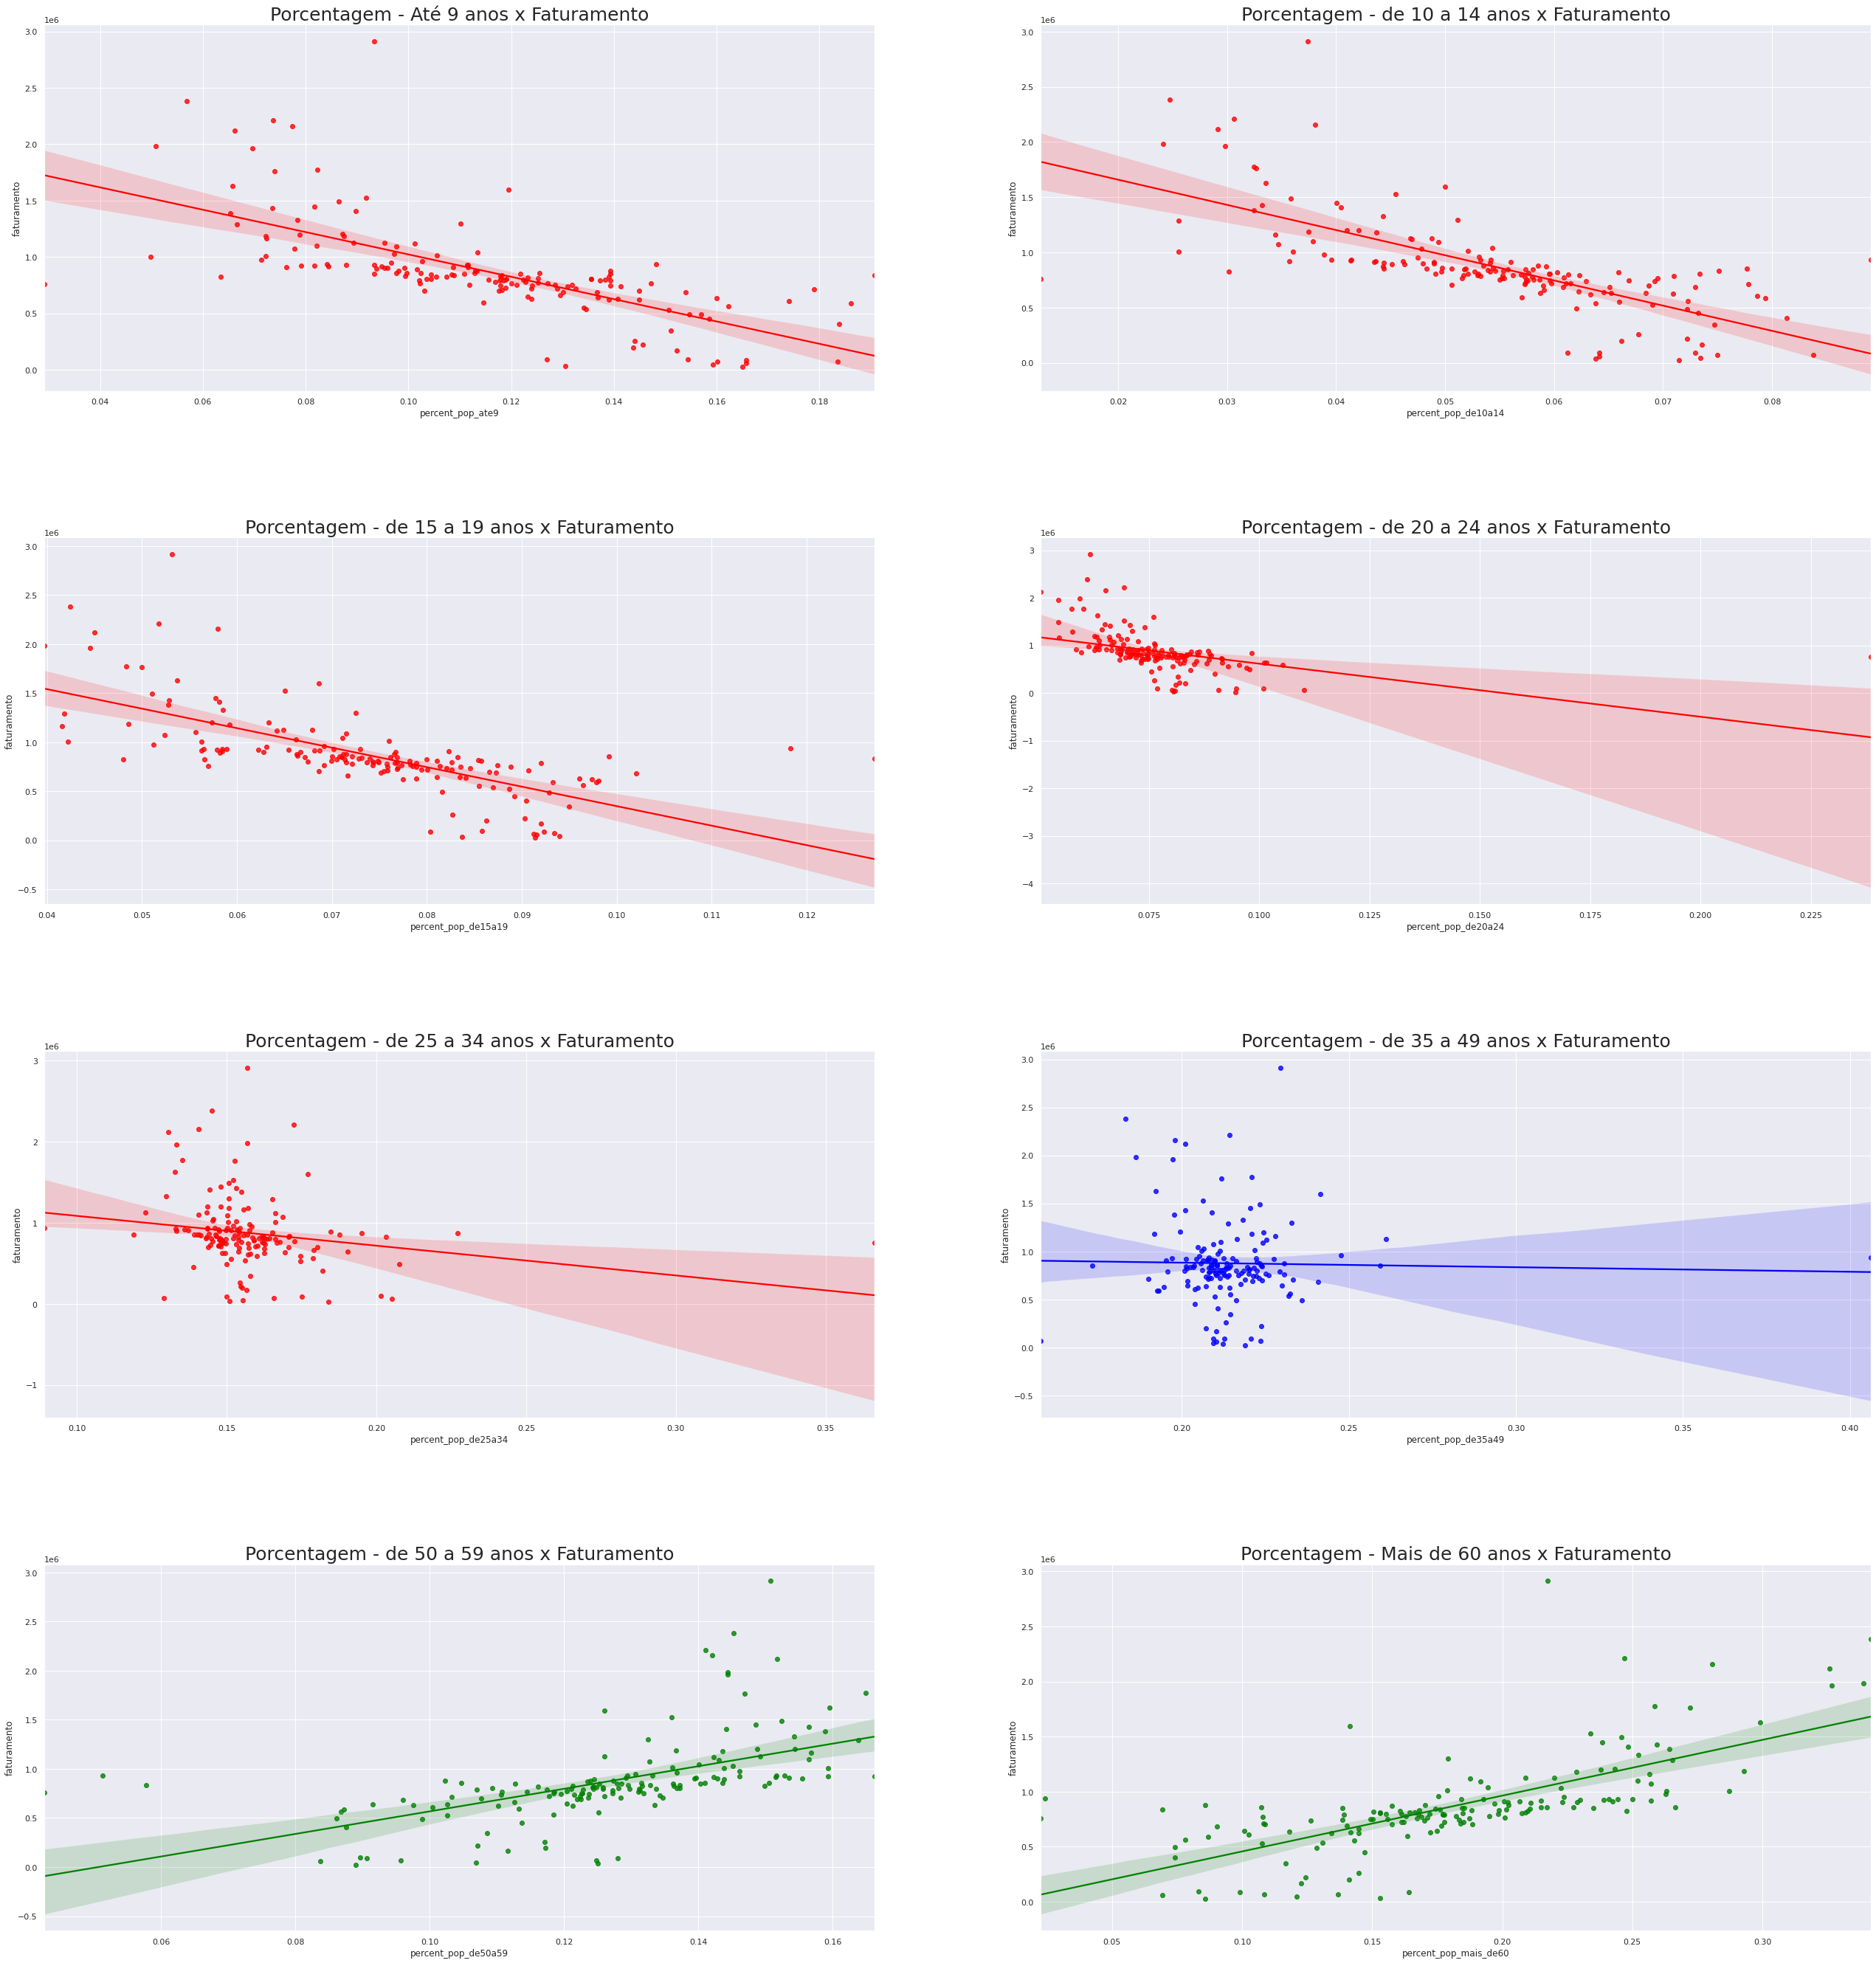

In [1500]:
grid = plt.GridSpec(4, 2)

plt.subplot(grid[0, 0])
# Porcentagem - Até 9 anos x Faturamento
sns.regplot(x = df3['percent_pop_ate9'], y = df3['faturamento'], color='red')
plt.title('Porcentagem - Até 9 anos x Faturamento', fontdict={'fontsize':25})

plt.subplot(grid[0, 1])
# Porcentagem - de 10 a 14 anos x Faturamento
sns.regplot(x = df3['percent_pop_de10a14'], y = df3['faturamento'], color='red')
plt.title('Porcentagem - de 10 a 14 anos x Faturamento', fontdict={'fontsize':25})

plt.subplot(grid[1, 0])
# Porcentagem - de 15 a 19 anos x Faturamento
sns.regplot(x = df3['percent_pop_de15a19'], y = df3['faturamento'], color='red')
plt.title('Porcentagem - de 15 a 19 anos x Faturamento', fontdict={'fontsize':25})

plt.subplot(grid[1, 1])
# Porcentagem - de 20 a 24 anos x Faturamento
sns.regplot(x = df3['percent_pop_de20a24'], y = df3['faturamento'], color='red')
plt.title('Porcentagem - de 20 a 24 anos x Faturamento', fontdict={'fontsize':25})

plt.subplot(grid[2, 0])
# Porcentagem - de 25 a 34 anos x Faturamento
sns.regplot(x = df3['percent_pop_de25a34'], y = df3['faturamento'], color='red')
plt.title('Porcentagem - de 25 a 34 anos x Faturamento', fontdict={'fontsize':25})

plt.subplot(grid[2, 1])
# Porcentagem - de 35 a 49 anos x Faturamento
sns.regplot(x = df3['percent_pop_de35a49'], y = df3['faturamento'], color='Blue')
plt.title('Porcentagem - de 35 a 49 anos x Faturamento', fontdict={'fontsize':25})

plt.subplot(grid[3, 0])
# Porcentagem - de 50 a 59 anos x Faturamento
sns.regplot(x = df3['percent_pop_de50a59'], y = df3['faturamento'], color='green')
plt.title('Porcentagem - de 50 a 59 anos x Faturamento', fontdict={'fontsize':25})

plt.subplot(grid[3, 1])
# Porcentagem - Mais de 60 anos x Faturamento
sns.regplot(x = df3['percent_pop_mais_de60'], y = df3['faturamento'], color='green')
plt.title('Porcentagem - Mais de 60 anos x Faturamento', fontdict={'fontsize':25})

# Ajuste subplots
plt.subplots_adjust(left=0.125,
                    bottom=0.01, 
                    right=1.5, 
                    top=3, 
                    wspace=0.2, 
                    hspace=0.40)

### H14. Domicílio Bairro x Faturamento
- Maior Faturamento em bairros com porcentagem de Domicílios A e B superior
- Menor Faturamento em bairros com porcentagem de Domicílios C, D e E superior

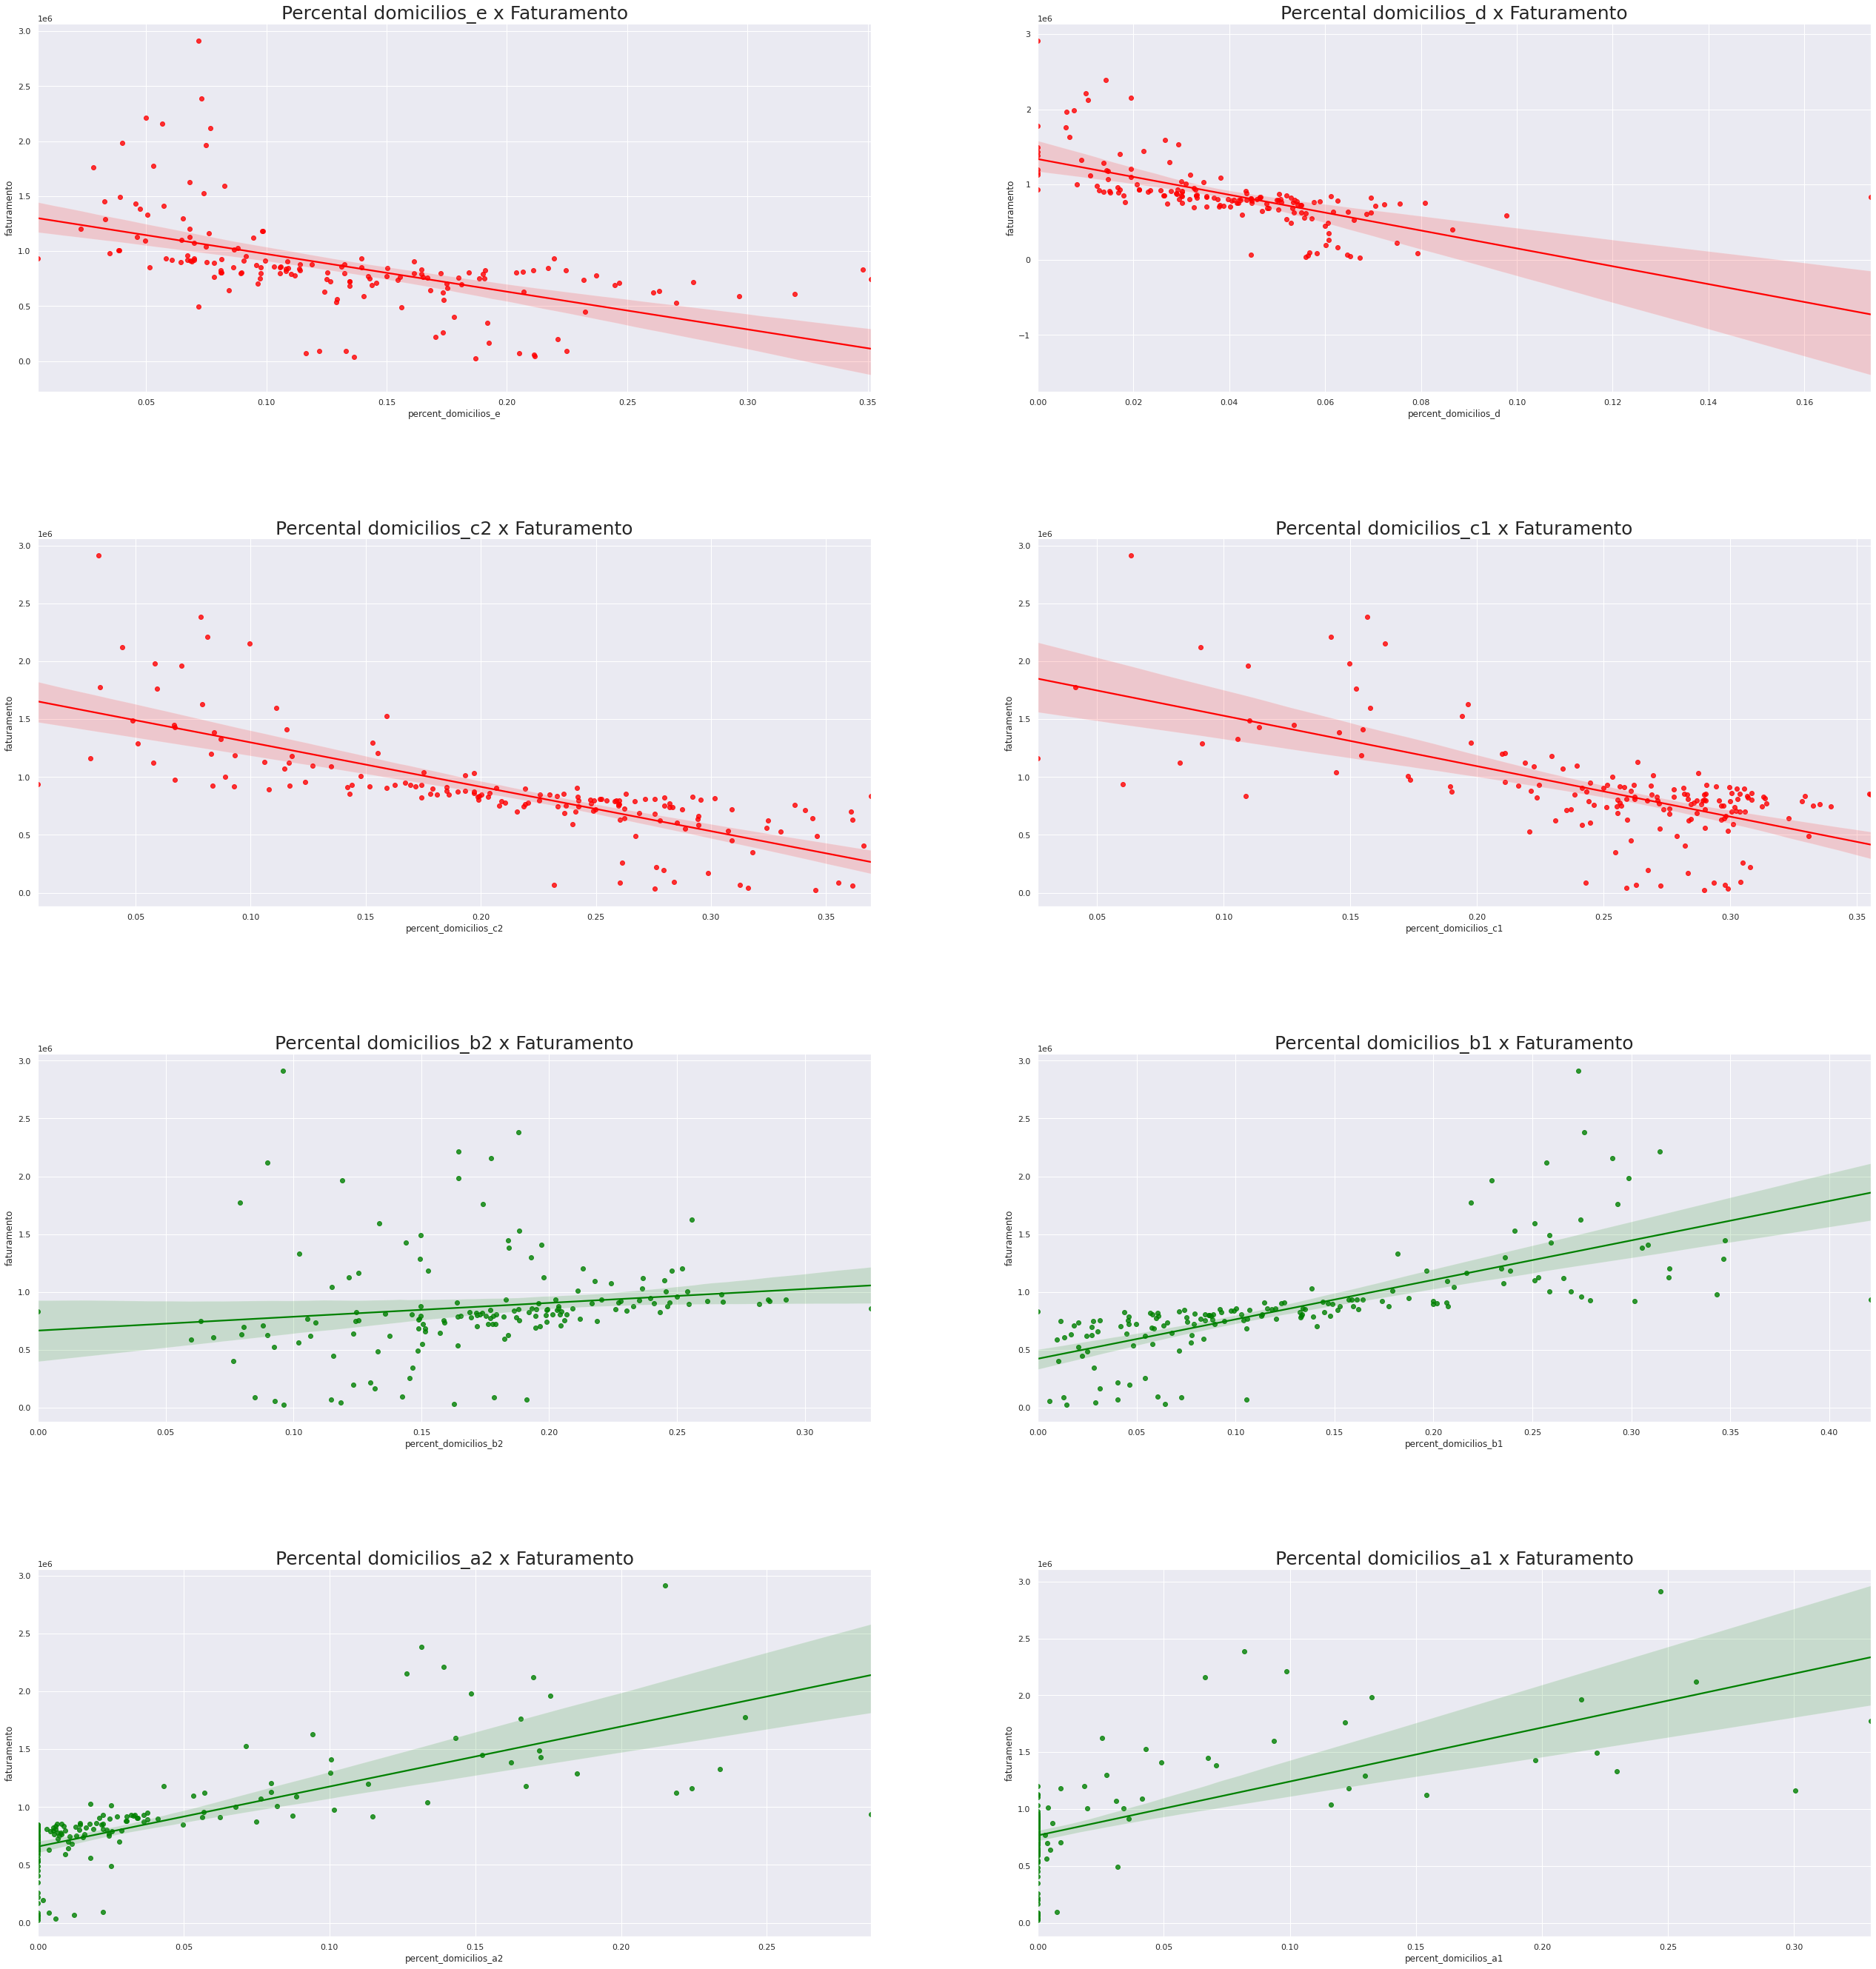

In [1501]:
grid = plt.GridSpec(4, 2)

plt.subplot(grid[0, 0])
# Percentual - domicilios_e x Faturamento
sns.regplot(x = df3['percent_domicilios_e'], y = df3['faturamento'], color='red')
plt.title('Percental domicilios_e x Faturamento', fontdict={'fontsize':25})

plt.subplot(grid[0, 1])
# Percentual - domicilios_d x Faturamento
sns.regplot(x = df3['percent_domicilios_d'], y = df3['faturamento'], color='red')
plt.title('Percental domicilios_d x Faturamento', fontdict={'fontsize':25})

plt.subplot(grid[1, 0])
# Percentual - domicilios_c2 x Faturamento
sns.regplot(x = df3['percent_domicilios_c2'], y = df3['faturamento'], color='red')
plt.title('Percental domicilios_c2 x Faturamento', fontdict={'fontsize':25})

plt.subplot(grid[1, 1])
# Percentual - domicilios_c1 x Faturamento
sns.regplot(x = df3['percent_domicilios_c1'], y = df3['faturamento'], color='red')
plt.title('Percental domicilios_c1 x Faturamento', fontdict={'fontsize':25})

plt.subplot(grid[2, 0])
# Percentual - domicilios_b2 x Faturamento
sns.regplot(x = df3['percent_domicilios_b2'], y = df3['faturamento'], color='green')
plt.title('Percental domicilios_b2 x Faturamento', fontdict={'fontsize':25})

plt.subplot(grid[2, 1])
# Percentual - domicilios_b1 x Faturamento
sns.regplot(x = df3['percent_domicilios_b1'], y = df3['faturamento'], color='green')
plt.title('Percental domicilios_b1 x Faturamento', fontdict={'fontsize':25})

plt.subplot(grid[3, 0])
# Percentual - domicilios_a2 x Faturamento
sns.regplot(x = df3['percent_domicilios_a2'], y = df3['faturamento'], color='green')
plt.title('Percental domicilios_a2 x Faturamento', fontdict={'fontsize':25})

plt.subplot(grid[3, 1])
# Percentual - domicilios_a1 x Faturamento
sns.regplot(x = df3['percent_domicilios_a1'], y = df3['faturamento'], color='green')
plt.title('Percental domicilios_a1 x Faturamento', fontdict={'fontsize':25})

# Ajuste subplots
plt.subplots_adjust(left=0.125,
                    bottom=0.01, 
                    right=1.5, 
                    top=3, 
                    wspace=0.2, 
                    hspace=0.40)

### H16. População Absoluta Bairro x Faturamento
- Baixa correlação entre as variáveis

<AxesSubplot:>

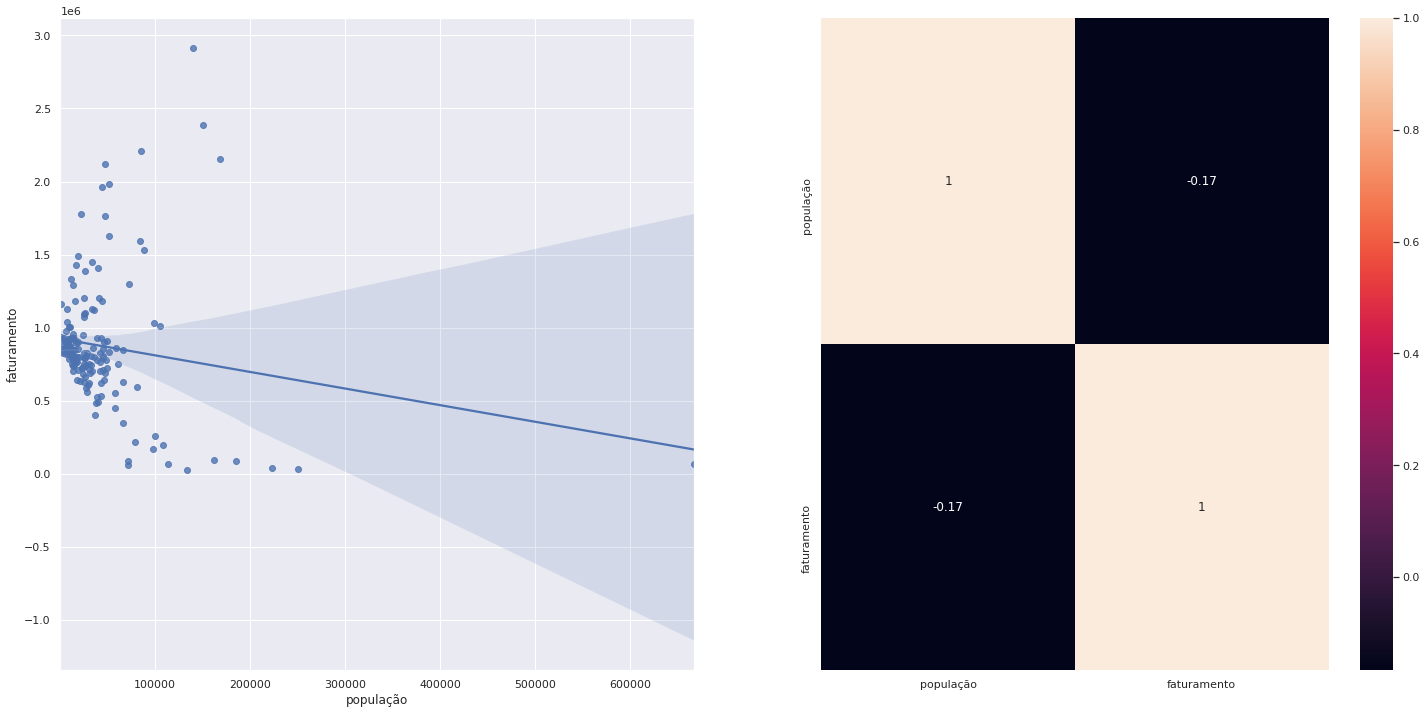

In [1502]:
grid = plt.GridSpec(1, 2)

plt.subplot(grid[0, 0])
sns.regplot(x='população', y='faturamento', data=df3)

plt.subplot(grid[0, 1])
sns.heatmap(df3[['população', 'faturamento']].corr(method='pearson'), annot=True)

### H17. População Absoluta Subprefeitura x Faturamento
- A correlação entre as variáveis é baixa
- Entretanto, é possível perceber uma pequena tendência de redução de faturamento em subprefeituras mais populosas.

<AxesSubplot:>

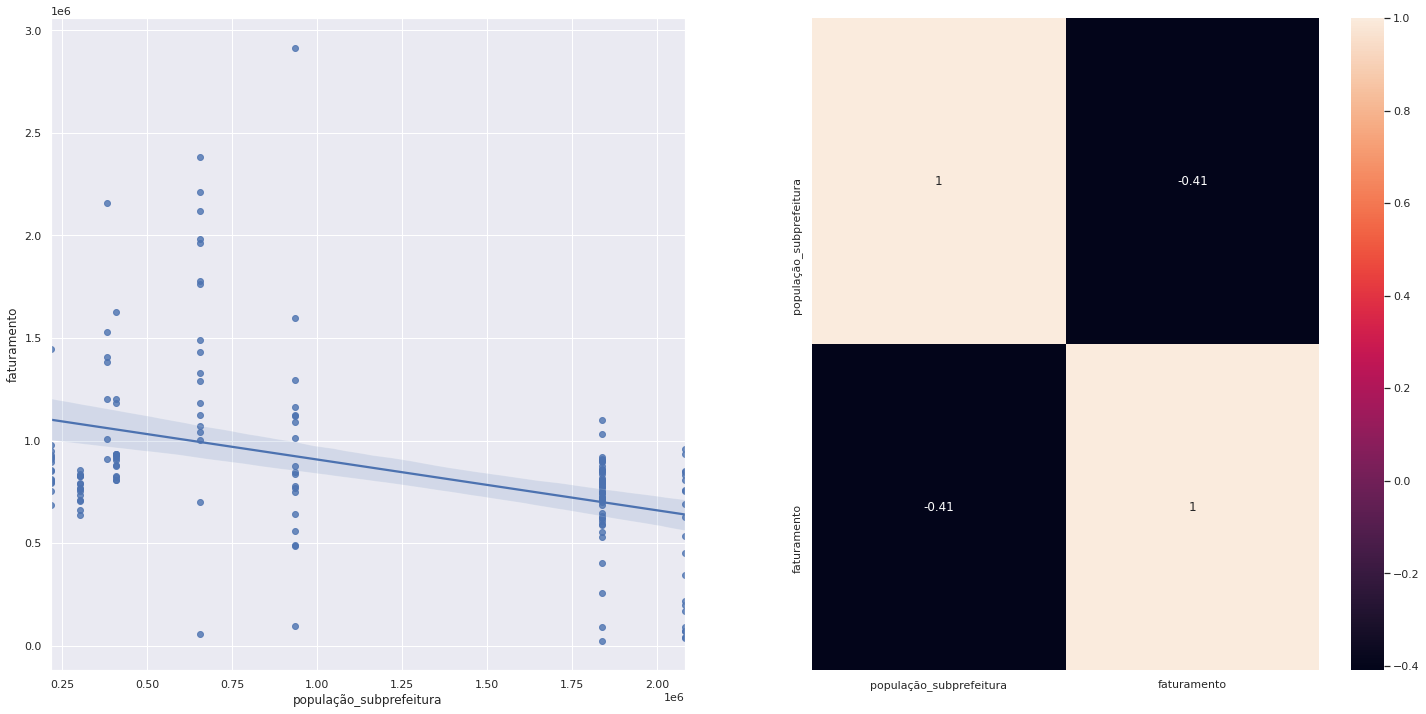

In [1503]:
grid = plt.GridSpec(1, 2)

plt.subplot(grid[0, 0])
sns.regplot(x='população_subprefeitura', y='faturamento', data=df3)

plt.subplot(grid[0, 1])
sns.heatmap(df3[['população_subprefeitura', 'faturamento']].corr(method='pearson'), annot=True)

## 3.3. Análise Multivariada

In [1516]:
num_attributes = df3.select_dtypes(include=['float64', 'int64'])
num_attributes = num_attributes.drop('codigo', axis=1)

cat_attributes = df3.select_dtypes(exclude=['float64', 'int64'])
cat_attributes = cat_attributes.drop('')

### 3.3.1. Atributos Numéricos

<AxesSubplot:>

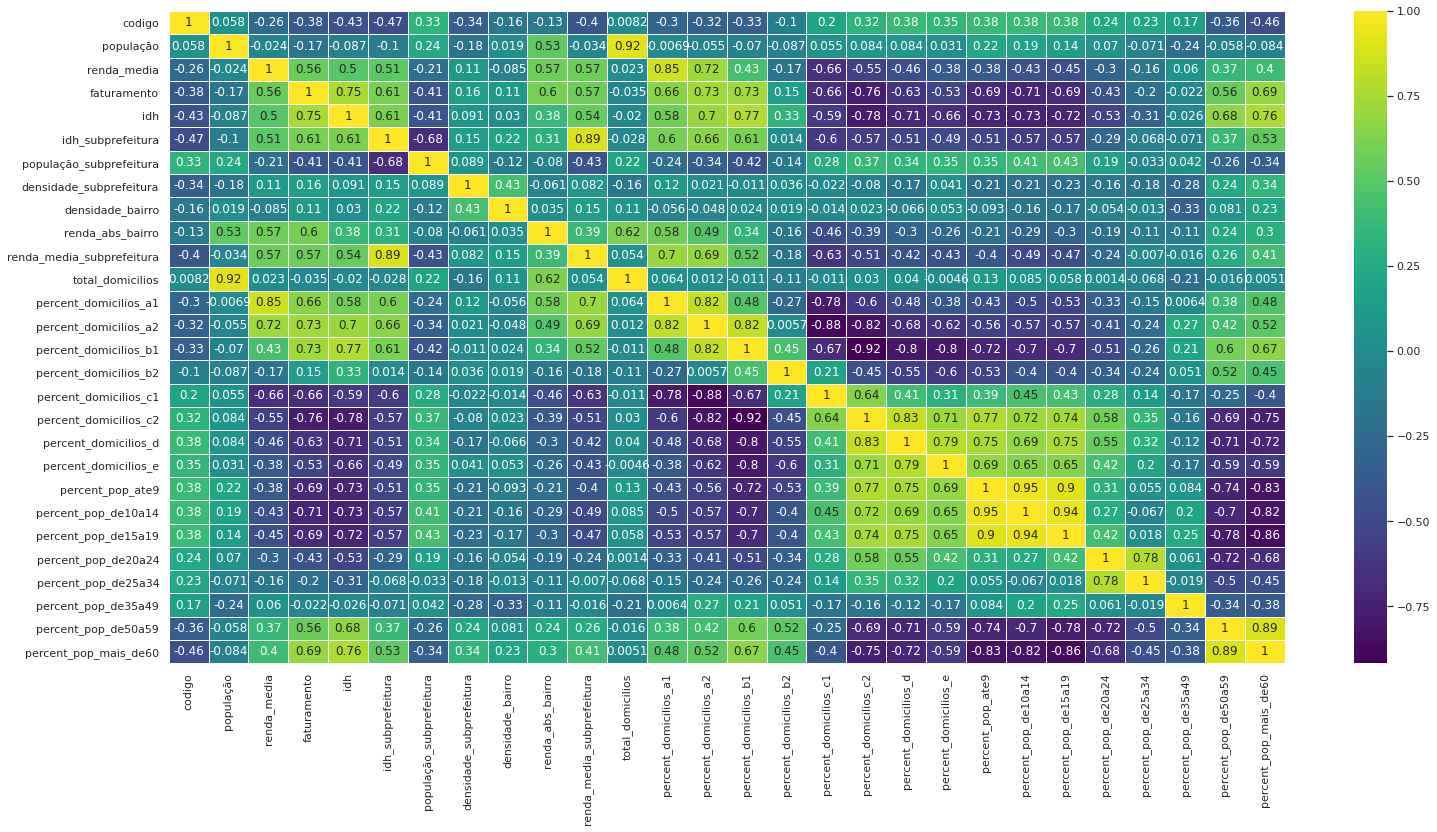

In [1505]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, cmap='viridis', linewidths=.5, annot=True)

Correlações Altas -> 

In [1526]:
age_att = num_attributes.iloc[:, 20:]

<AxesSubplot:>

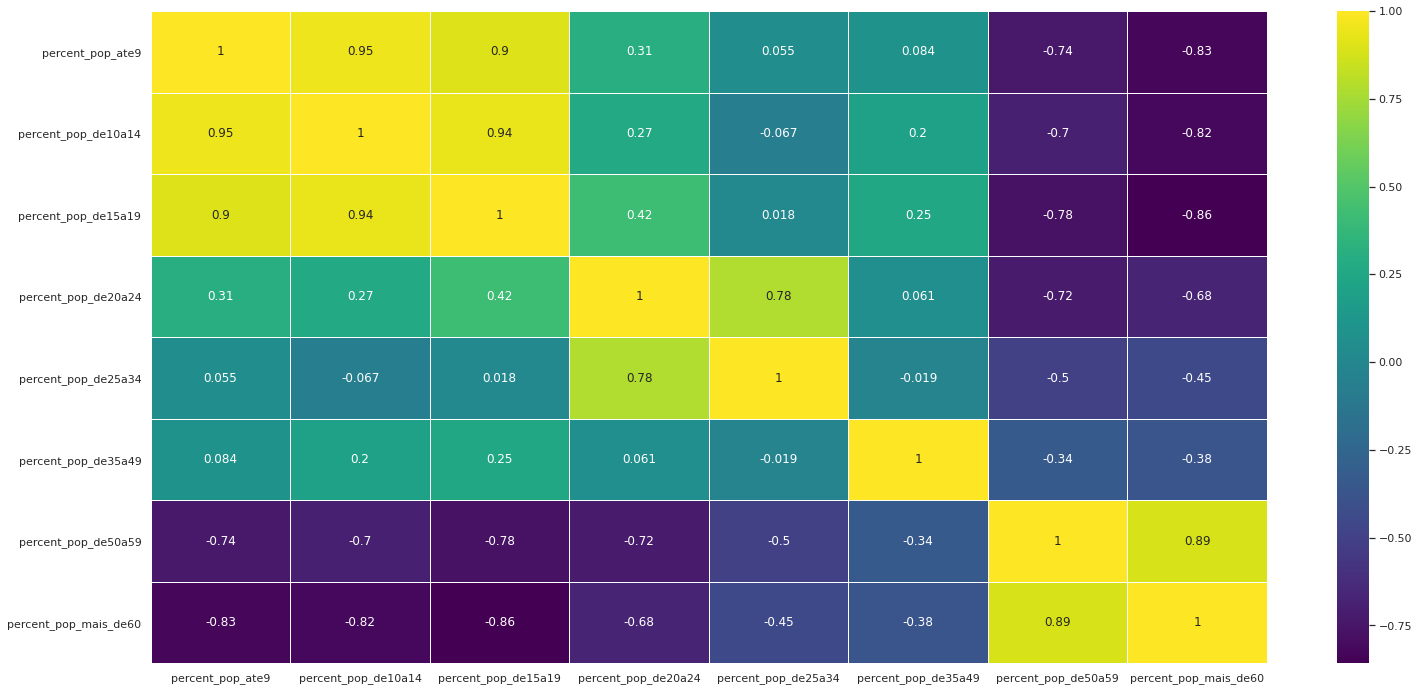

In [1527]:
correlation = age_att.corr(method='pearson')
sns.heatmap(correlation, cmap='viridis', linewidths=.5, annot=True)

In [1528]:
domic_att = num_attributes.iloc[:, 12:20]

<AxesSubplot:>

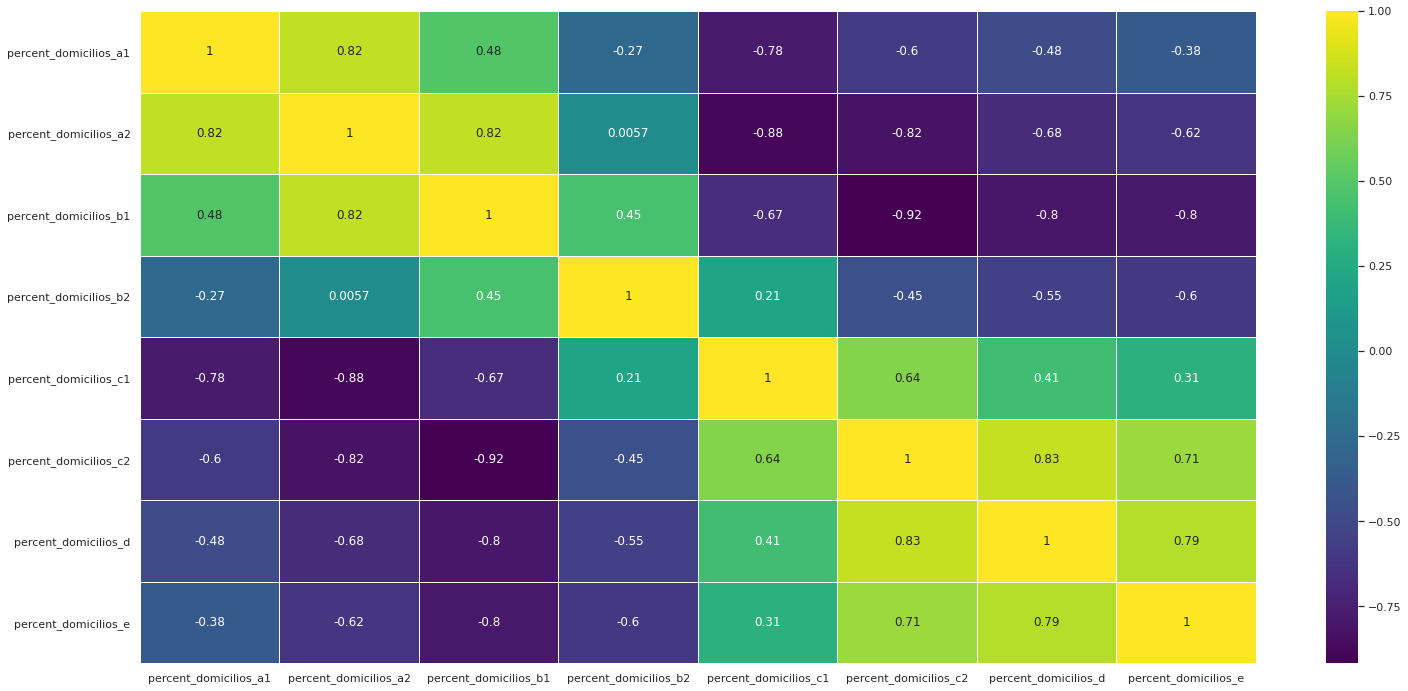

In [1529]:
correlation = domic_att.corr(method='pearson')
sns.heatmap(correlation, cmap='viridis', linewidths=.5, annot=True)

# 4.0. Tratamento

In [1690]:
df4 = df3.copy()

## 4.1. Feature Engineering

In [1691]:
# domicilio A e B
df4['percent_ab'] = (df4['percent_domicilios_a1'] + df4['percent_domicilios_a2'] + 
                     df4['percent_domicilios_b1'] + df4['percent_domicilios_b2'])

# idade
df4['percent_50'] = df4['percent_pop_de50a59'] + df4['percent_pop_mais_de60']

## 4.2. Eliminação e Separação

In [1692]:
X = df4.drop(['faturamento', 'codigo', 'nome', 'cidade', 'estado', 'regiao_adm', 
              'percent_domicilios_a1', 'percent_domicilios_a2','percent_domicilios_b1', 
              'percent_domicilios_b2','percent_domicilios_c1', 'percent_domicilios_c2',
              'percent_domicilios_d', 'percent_domicilios_e', 'percent_pop_ate9',
              'percent_pop_de10a14', 'percent_pop_de15a19', 'percent_pop_de20a24',
              'percent_pop_de25a34', 'percent_pop_de35a49', 'percent_pop_de50a59',
              'percent_pop_mais_de60'], axis=1)

y = df4.loc[:, 'faturamento']

## 4.3. Encoding

In [1693]:
# Subprefeitura -> ohe
ohe = pd.get_dummies(X['subprefeitura'])
X = pd.merge(X, ohe, how='inner', left_index=True, right_index=True)
X = X.drop('subprefeitura', axis=1)

## 4.4. Normalização da Variável Target

In [1694]:
# Transformando em log
y = np.log1p(y)

# 5.0. Feature Selection

In [1695]:
X_feat = X.copy()

## 5.1. Normalizando os Dados

In [1696]:
from sklearn.preprocessing import MinMaxScaler

In [1697]:
list_columns = ['população', 'renda_media', 'idh', 'idh_subprefeitura',
                'população_subprefeitura', 'densidade_subprefeitura',
                'densidade_bairro', 'renda_abs_bairro', 'renda_media_subprefeitura',
                'total_domicilios', 'percent_ab', 'percent_50']

scaler = MinMaxScaler()
for value in list_columns:
    scaled = scaler.fit_transform(X[[value]].values)
    X_feat[value] = scaled

## 5.2. Feature Selection Boruta

In [1698]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [1699]:
# define RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1)

# define Boruta
boruta = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=32).fit(X_feat.values, y.values)

In [1700]:
cols_selected = boruta.support_.tolist()

In [1701]:
cols_selected_boruta = X.iloc[:, cols_selected].columns.to_list()
cols_selected_boruta

['população',
 'renda_media',
 'idh',
 'renda_abs_bairro',
 'total_domicilios',
 'percent_ab',
 'percent_50']

## 5.3. Feature Selection Manual

<AxesSubplot:>

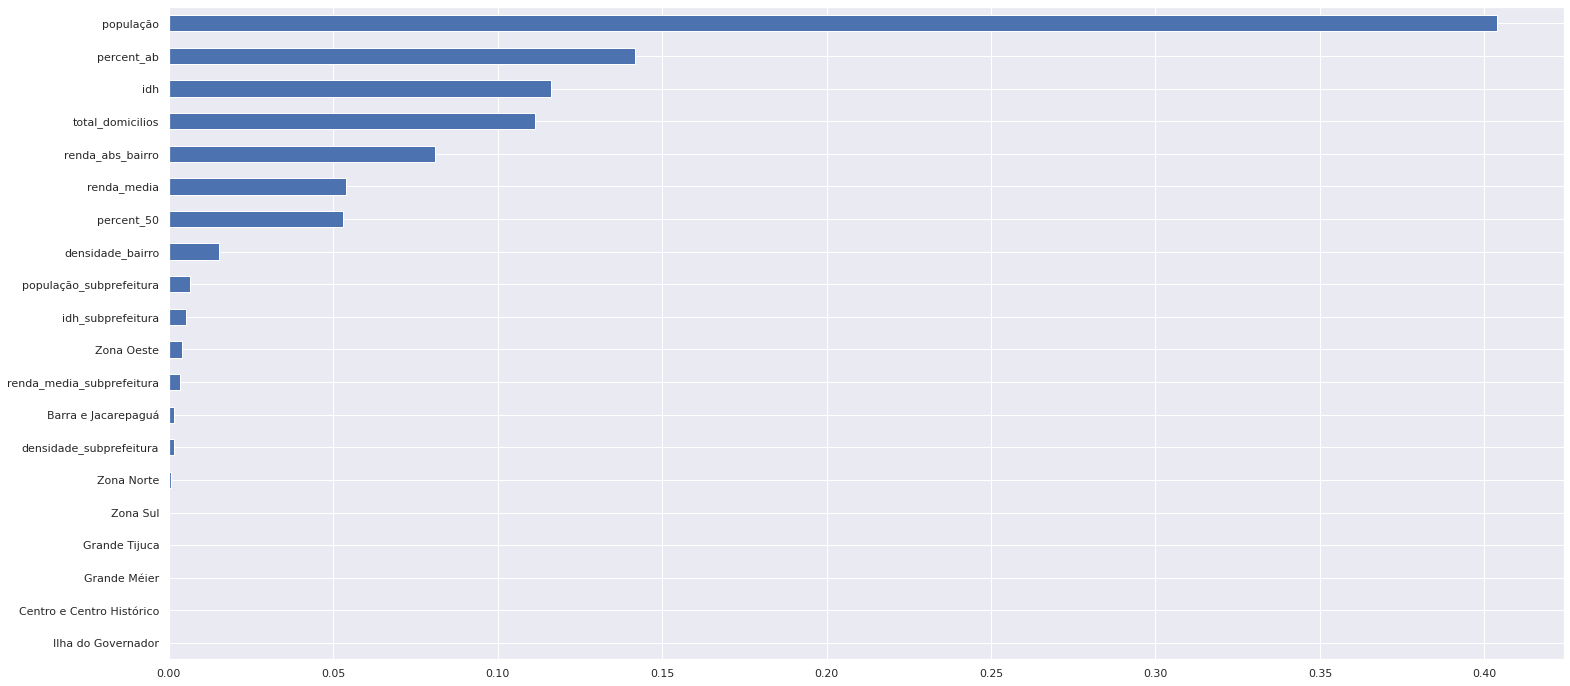

In [1702]:
#feature importances 
rf_model = RandomForestRegressor()
rf_model.fit(X_feat, y)

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')

## 5.4. Recursive Feature Elimination (RFE)

In [1703]:
from sklearn.feature_selection import RFE

In [1704]:
rfe = RFE(estimator=rf_model, n_features_to_select=5)
fit = rfe.fit(X_feat, y)

In [1705]:
for i in range(X.shape[1]):
    print('{} - Rank: {}'.format(X.columns[i], rfe.ranking_[i]))

população - Rank: 1
renda_media - Rank: 3
idh - Rank: 1
idh_subprefeitura - Rank: 8
população_subprefeitura - Rank: 6
densidade_subprefeitura - Rank: 7
densidade_bairro - Rank: 4
renda_abs_bairro - Rank: 1
renda_media_subprefeitura - Rank: 5
total_domicilios - Rank: 1
percent_ab - Rank: 1
percent_50 - Rank: 2
Barra e Jacarepaguá - Rank: 12
Centro e Centro Histórico - Rank: 15
Grande Méier - Rank: 13
Grande Tijuca - Rank: 16
Ilha do Governador - Rank: 14
Zona Norte - Rank: 9
Zona Oeste - Rank: 10
Zona Sul - Rank: 11


### 5.5. Lista Final de Features

In [1706]:
features = ['população', 'renda_media', 'idh', 'renda_abs_bairro', 'total_domicilios', 'percent_ab', 'percent_50']
X = X[features]

## 6.0. Modelagem de Machine Learning

In [1707]:
# Regressao linear
# Decision Tree Regressor
# XGBoostRegressor

In [1752]:
from sklearn                 import model_selection   as ms
from sklearn.metrics       import mean_absolute_error, mean_squared_error
from sklearn                 import linear_model      as lm
from sklearn                 import tree      as tr

In [1753]:
def ml_performance(X, y, modelo, folds):
    
    kf = ms.KFold(n_splits=folds)
    
    list_mae = []
    list_mape = []
    list_rmse = []
    
    for train_index, test_index in kf.split(X, y):
        
        # treino
        X_train = X.iloc[train_index, :]
        y_train = y.iloc[train_index]
        
        #teste
        X_test = X.iloc[test_index, :]
        y_test = y.iloc[test_index]
        
        
        scaler = MinMaxScaler()
        for value in X.columns:
            scaled_train = scaler.fit_transform(X_train[[value]].values)
            X_train.loc[:, value] = scaled_train.copy()
            
            scaled_test = scaler.fit_transform(X_test[[value]].values)
            X_test[value] = scaled_test
            
        model = modelo.fit(X_train, y_train)
        
        # predicoes
        yhat = model.predict(X_test)
        
        mae = mean_absolute_error(np.expm1(y_test), np.expm1(yhat))
        list_mae.append(mae)
        
        mape = mean_absolute_percentage_error(np.expm1(y_test), np.expm1(yhat))
        list_mape.append(mape)
        
        rmse = mean_squared_error(np.expm1(y_test), np.expm1(yhat))
        list_rmse.append(rmse)
            
    
    return pd.DataFrame({'Model Name': type(modelo).__name__, 
                         'MAE': mae.mean(), 
                         'MAPE': mape.mean(),
                         'RMSE': rmse.mean() }, index=[0])
        
        

In [1756]:
ml_performance(X, y, tr.DecisionTreeRegressor(), 10)

/home/tcbm/.pyenv/versions/3.8.0/envs/geofusion/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-1753-005ab6c318c7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[value] = scaled_test
/home/tcbm/.pyenv/versions/3.8.0/envs/geofusion/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/home/tcbm/.pyenv/versions/3.8.0/envs/geofusion/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-1753-005ab6c318c7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[value] = scaled_test
/home/tcbm/.pyenv/versions/3.8.0/envs/geofusion/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Model Name,MAE,MAPE,RMSE
0,DecisionTreeRegressor,132157.312,0.226,26949883915.937


In [1746]:
X

,população,renda_media,idh,renda_abs_bairro,total_domicilios,percent_ab,percent_50
0,11676,2501.000,0.857,29201676.000,4349,0.483,0.403
1,9003,2391.000,0.877,21526173.000,2649,0.435,0.281
2,43591,2963.000,0.900,129160133.000,15954,0.539,0.372
3,15445,2342.000,0.877,36172190.000,5533,0.443,0.357
4,46584,2260.000,0.857,105279840.000,16708,0.377,0.362
5,43362,2325.000,0.858,100816650.000,15109,0.396,0.317
6,9538,1374.000,0.839,13105212.000,2830,0.236,0.277
7,38547,2038.000,0.859,78558786.000,13007,0.364,0.322
8,51234,4671.000,0.931,239314014.000,19903,0.650,0.459
9,44603,1944.000,0.850,86708232.000,15775,0.344,0.346
